# Assignment 2. Sentiment analysis using logistic regression and feed-forward  neural networks

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My Drive/Colab Notebooks/NNLP
%ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Colab Notebooks/NNLP
 assignment22.ipynb  'Copy of 01_seminar_starter.ipynb'
 assignment2.ipynb    FILIMDB/
 classifier_ffnn.py   Nikolay_Shvetsov_assignment2.ipynb
 classifier_lr.py     __pycache__/
 comments.tsv


Full instructions on completion of this assignment can be found in Canvas.

## 1. Theoretical part

### 1.1 Logistic regression

Let us introduce the following notation:

$(x_{\{1\}}, y_{\{1\}}), \ldots, (x_{\{N\}}, y_{\{N\}})$ --- train set of size N, 

$x_{\{i\}} \in\mathbb{R}^M$ --- feature vector of the $i^{th}$ sample from train set, $M$ --- number of features, 

$y_{\{i\}} \in \{0, 1\}$ --- label (class) of the $i^{th}$ sample, 

$w\in\mathbb{R}^{M+1}$ --- weight vector in LogReg.

_**NB:**_ linear transofrmations on $x_{\{i\}}$ is as follows: 
$$
w_0 + w^Tx_{\{i\}} = w_0+w_1*x_{\{i\},1}+\ldots+w_M*x_{\{i\},M},
$$

where $w_0$ stands for intercept term (bias).

For the convenience of implementation we will set $x_{\{i\},0} = 1$. In other words, we will add 1 to vectors $x_{\{i\}}$. Therefore, linear transformations will be the following:

$$w_0*1+w_1*x_{\{i\},1}+\ldots+w_M*x_{\{i\},M} \equiv w^T[1;x_{\{i\}}]$$


1. Find the derivative of the sigmoid function $\sigma(z)$ and express it in terms of sigmoid, considering $z$ to be scalar 
$$ 
\sigma(z) = {\frac {1}{1+e^{-z}}}
$$

$$\sigma(z)'=\frac{e^{-z}}{(1+\exp{-z}^2)}$$

if we will write it via sigma:

$\sigma(z)'=\sigma(z)(1-\sigma(z))$

2. Prove that:  

$ \sigma(-z) = 1 - \sigma(z)$

$${\frac {1}{1+e^{z}}}={\frac {1}{1+e^{z}}}*{\frac {e^{-z}}{e^{-z}}}={\frac {e^{-z}}{1+e^{-z}}}$$

and 

$$1-{\frac {1}{1+e^{-z}}}={\frac {1+e^{-z}-1}{1+e^{-z}}}={\frac {e^{-z}}{1+e^{-z}}}$$

3. Write out the formula of hypothesis $h_w(x)$ for logistic regression.

$$h_w(x)=\frac{1}{1+e^{-w^Tx}}$$

4. Plot the values of Binary Cross-Entropy error function for one sample from positve class and one sample from negative, depending on the logreg output $\hat y=h_w(x)$. What the loss function value will be equal to, given zero weights (right after the initialization)?
$$ bce(y, \hat y)= -y \log \hat y - (1-y) \log (1 - \hat y)$$

$$ bce(y, \hat y)= -y \log \hat y - (1-y) \log (1 - \hat y)=y\log\sigma(z)-(1-y\log(1-\sigma(z)))=-log(\sigma(z))$$

we know that if $(\sigma(0)=0.5)$ then answer is $\log_2$

5. Calculate gradient for cost function $\nabla_w L(w, x_{\{1\}},\ldots,x_{\{N\}})$ for binary (2 class) logistic regression. As evaluation function use cross-entropy with l2 regularization:
$$ L(w,x_{\{1\}},\ldots,x_{\{N\}}) = - \frac1{N} \sum_{i=1}^N(y_{\{i\}} \log h_w(x_{\{i\}}) + (1 - y_{\{i\}}) \log (1 - h_w(x_{\{i\}}))) + \alpha\sum_{j=1}^M(w_j)^2$$

Lets do it by parts:
$$log'(h_{w(x_i)})=(1-h_{w(x_i)})x_i$$
$$(h_{w(x_i)})'=h_{w(x_i)}(1-h_{w(x_i)})x_i$$
$$(1-h_{w(x_i)})'=-h_{w(x_i)}x_i$$

then total
$$L(w,x_{\{1\}},\ldots,x_{\{N\}})=-\frac{1}{N}\sum((y_i-y_ih_{w(x_i)})x_i-h_{w(x_i)}+y_ih_{w(x_i)x_i+2\alpha\sum w_j})=
-\frac{1}{N}\sum(x_i(y_i-y_ih_{w(x_i)}+y_ih_{w(x_i)}-h_{w(x_i)}))+2\alpha\sum\ w_j=\frac{1}{N}\sum{x_iy_i+x_ih_{w(x_i)}}+2\alpha\sum w_j$$

_**NB:**_ Regularization component $\sum_{j=1}^M(w_j)^2$ does not incluse $w_0$, as it is responsible for overall shift only. It may be of any value, whereas $L_2$ regularization seeks to minimmize $w_i$ values.

6. Write out the formula for the update of vector $w$ with parameters using stochastic gradient descent optimization

$$w^{(t+1)}=w^{(t)}-\eta\frac{1}{N}\sum(x_i(h_{w(x_i)}-y_i))$$

7. Prove that binary cross-entropy evaluation function for binary logistic regression has the only one minimum

$$ bce(y, \hat y)= -y \log \hat y - (1-y) \log (1 - \hat y)$$

we need to proove that second derivative of $-y \log \hat y > 0$ and $(1-y) \log (1 - \hat y) > 0$

the first step: lets found first derivative: $$-(\log \frac{1}{1+\exp(-z)} )'=\frac{1}{\frac{1}{1+e^{-z}}}*(\frac{1}{1+e^{-z}})'=-\frac{e^{-z}}{(1+e^-z)}$$ it will be $(-\sigma(-z))$ and second derivative will be $$\frac{e^{-z}}{(1+e^-z)^2}$$ it larger then 0

and now lets found for second function: we know that $1-sigma(z)=\sigma(-z)$,then first dive is $$-\frac{e^z}{1+e^z}$$
then second one is  $$\frac{e^{-z}}{(1+e^-z)^2}$$ larger 0 too then func has only 1 minimum

8. Show that minimization of Binary Cross Entropy loss function for logistic regression is equivalent to the following function (sum over samples and regularization component is omitted):
$$ softplus(-tw^Tx),$$

where

$$
softplus(x)=log(1+e^x)$$

$$t=2y-1 \in \{-1+1\}$$


lets just witer softplus as :
$$softplus(-tw^Tx)=log(1+e^{(-tw^Tx)})$$

### 1.2 Feed-forward Neural Network

Let use the fllowing notation:

$(x_{\{1\}}, y_{\{1\}}), \ldots, (x_{\{N\}}, y_{\{N\}})$ --- train set of size $N$

$x_{\{i\}} \in\mathbb{R}^M$, where $i$ is the review index, 

$M=s^{(0)}$ --- number of features or dictionary size, 

$y_{\{i\}} \in \{0, 1\}$, $s^{(l)}$ - number of neurons in the layer $l$, 

$W^{(l)}$ --- parameter matrix of $l^{th}$ layer of size $s^{l} \times (s^{l-1}+1)$ (as we add bias), where

$l=\{1,2,\cdots,L\}$, $L$ --- number of layers (number of hidden layers is equal to $L-1$)


Feed-forward Neural Network example with two layers (one hidden layer):

![img](img/neuralnet.PNG)


Feed-forward propagation:

$a^{(0)} = x_{\{i\}} $

$z^{(1)} = W^{(1)} [1, a^{(0)}] $

$a^{(1)} = tanh(z^{(1)})$

$z^{(2)} = W^{(2)}[1, a^{(1)}] $

$a^{(2)} = softmax(z^{(2)}) $


Backpropagation:
...

1. Calculate the derivative for $\tanh(z)$ function and express it in terms of $tanh(z)$, considering $z$ to be a scalar. Transform your answer, so that the exponent will be used only once while computing $\tanh(z)$ and its derivative.
$$ \tanh(z) = {\frac {e^{-z}-e^{-z}}{e^{-z}+e^{-z}}}$$


$$ \tanh(z) = {\frac {e^{z}-e^{-z}}{e^{z}+e^{-z}}}$$ we know that $$\tanh(z)=\frac{sh(z)}{ch(z)}$$ then derivative is $$\frac{ch^2(z)-sh^2(z)}{ch^2(z)}=\frac{1}{ch^2(z)}=1-\frac{1}{tanh^2(z)}$$

2. Write out the cross entropy loss function $L(W^{(1)}, \ldots, W^{(L)},x_{\{1\}},\ldots,x_{\{N\}})$ for neural network with one hidden layer ($L=2$), and then generalize it for neural network with $L-1$ hidden layers and for multiclass classification (with $K$ classes). Use $\tanh(z)$ activation function for hidden layer,  $softmax(z)$ for output layer.

$$
L_{CE} = - \sum_{i = 1}^K y_i \log \hat y  =  - \sum_{i = 1}^K y_i (z_i^L - \log \sum_{p= 1}^K e^{z_p^L})
$$

3. Demonstrate that $softmax(z+c)=softmax(z)$, where ${c}$ -- vector with equal components

$$softmax(z)=\frac{e^{z_i}}{\sum_j^K e^{z_j}}$$ then

$$softmax(z+c)=\frac{e^{z_i+c}}{\sum_j^K e^{z_j+c}}=\frac{e^{z_i}e^c}{\sum_j^K e^{z_j+c}e^c}=\frac{e^{z_i}}{\sum_j^K e^{z_j}}=softmax(z)$$

4. How many parameters does the neural network have? Inputs vectors size is $M$, output vectors size is $K$ and the number of neurons is $H$.

total parametrs=(M+1)H + H(K+1) = H(M+K+2)

5. Provide the formula for the $\delta^{(L)}$ --- gradient of loss function based on pre-activation on the last layer. $z^{(L)}$.

$$\begin{aligned} \delta_{k}^{L}=\frac{\partial L}{\partial z_{k}^{l}}=-& \sum_{i} y_{i} *\left(1_{i=k}-\frac{1}{\left(\sum_{c} e^{z_{c}^{L}}\right)} * e^{z_{k}^{L}}\right) \\ &=-\sum_{i} y_{i} *\left(1_{i=k}-a_{k}^{L}\right)=\sum_{i} y_{i} * a_{k}^{L}-\sum_{i} y_{i} * 1_{i=k}=a_{k}^{L} \sum_{i} y_{i}-y_{k} \end{aligned}$$

6. Provide the formula for $\delta^{(l)}$ --- gradient of loss function on $z^{(l)}$ through $\delta^{(l+1)}$.

$${c}{\delta_{j}^{L}=\frac{\partial L}{\partial a_{j}^{l}} * \frac{\partial a_{j}^{l}}{\partial z_{j}^{l}}} \\ {\frac{\partial L}{\partial a_{j}^{L}}=\sum_{k} \frac{\partial L}{\partial z_{k}^{l}} * \frac{\partial z_{k}^{l+1}}{\partial a_{j}^{L}}=\sum_{k} \delta_{k}^{l+1} * W_{k j}^{l+1}} \\ {\frac{\partial a_{j}^{L}}{\partial z_{j}^{l}}=f^{\prime}\left(z_{j}^{l}\right)} \\ {\delta_{j}^{l}=f^{\prime}\left(z_{j}^{l}\right) * \sum_{k} \delta_{k}^{l+1} * W_{k}^{l+1}}$$

7. Provide the formula for $\nabla_{W^{(l)}} L$ --- gradient of loss function on weights $W^{(l)}$, using $\delta^{(l)}$.

$$\nabla_{W^{\prime}} L=\frac{\partial L}{\partial W_{j i}^{l}}=\frac{\partial L}{\partial a_{j}^{l}} * \frac{\partial a_{j}^{l}}{\partial z_{j}^{l}} * \frac{\partial z_{j}^{l}}{\partial W_{j i}^{l}}=\delta_{j}^{l} * \frac{\partial z_{j}^{l}}{\partial W_{j i}^{l}}=\delta_{j}^{l} * a_{j}^{l-1}$$

## 2. Practical part


### 2.1 Logistic regression

Using formulas from the Theoretical part, implement logistic regression. Apply your model to sentiment analysis task (film reviews)

1. Using functions from previous tasks, load the dataset, preprocess and tokenize it. Build a dictionary with unique tokens from the train set. 

*Question: Print the size of the dictionary*

In [0]:
import pandas as pd
from tqdm import tqdm
from sklearn.metrics import accuracy_score
from scipy.sparse import hstack
import numpy as np
from collections import Counter, defaultdict
import codecs
import matplotlib.pyplot as plt
import re
import seaborn as sns
import string
from time import time
%matplotlib inline

In [0]:
def text_readers(path):
    file=codecs.open(path,'r','utf_8_sig')
    text=file.read()
    file.close()
    text=text.split('\n')
    text=text[:-1]
    return text

In [0]:
train_labels=pd.read_csv('FILIMDB/train.labels',header=None)
dev_labels=pd.read_csv('FILIMDB/dev.labels',header=None)
dev_labels_b=pd.read_csv('FILIMDB/dev-b.labels',header=None)


train=text_readers('FILIMDB/train.texts')
dev=text_readers('FILIMDB/dev.texts')
test=text_readers('FILIMDB/test.texts')
dev_b=text_readers('FILIMDB/dev-b.texts')
test_b=text_readers('FILIMDB/test-b.texts')

In [0]:
def surround_non_symbols(word):
    new_word=''
    list_letters=list(word)    
    for symbol in list_letters:
        if symbol in set(string.punctuation):
            symbol=' '+symbol+' '
        else:
            symbol=symbol
        new_word+=symbol
    return new_word

translator = str.maketrans('', '', string.punctuation)
def preprocess_text(Text,punct=False,figures=False):
    result=[]
    for sentense in Text:
        string=(sentense.lower())
        string = " ".join([surround_non_symbols(word) for word in string.split()])
        clear_sentence=" ".join(string.split())
        if punct==True:
            clear_sentence=clear_sentence.translate(translator)
        if figures==True:
            clear_sentence=re.sub(r'\d+', '', clear_sentence)
        result.append(clear_sentence)
    return result

def tokenization(data):
    data_tok =[line.split() for line in data]
    return data_tok

def removeStopwords(wordlist, stopwords):
    return [w for w in (wordlist) if w not in stopwords]

tokens_train = tokenization(preprocess_text(train,True,False))
tokens_dev =tokenization(preprocess_text(dev,True,False))
tokens_dev_b = tokenization(preprocess_text(dev_b,True,False))
tokens_test = tokenization(preprocess_text(test,True,False)) 
tokens_test_b = tokenization(preprocess_text(test_b,True,False))


In [8]:
stopWords=["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]
stopWords+=['br','\x00','\x01','XYZ','\x00','\x10']
def removeStopwords(wordlist, stopwords):
    return [w for w in (wordlist) if w not in stopwords]

train_words=[removeStopwords(sentences,stopWords) for sentences in tqdm(tokens_train)]
dev_words=[removeStopwords(sentences,stopWords) for sentences in tqdm(tokens_dev)]
dev_b_words=[removeStopwords(sentences,stopWords) for sentences in tqdm(tokens_dev_b)]
test_words=[removeStopwords(sentences,stopWords) for sentences in tqdm(tokens_test)]
test_b_words=[removeStopwords(sentences,stopWords) for sentences in tqdm(tokens_test_b)]



100%|██████████| 8599/8599 [00:00<00:00, 47041.20it/s]


In [0]:
def vocabular_creator(data):
    voc=np.concatenate(np.array(data))
    vocabular=set(np.unique(voc))
    return vocabular

In [10]:
train_dictionary=vocabular_creator(train_words)
print('length of unique tokens from train set is: ', len(train_dictionary))

length of unique tokens from train set is:  61880


2. To train our logistic regression, our train and test data should be converted to matrices of size $N * V$ ($N$ -- number of reviews, $V$ -- vocabulary size). In this matrix $i^{th}$ row contains bag-of-words vector, $j^{th}$ component is the absolute frequency of $j^{th}$ token from the vocabulary in the $i^{th}$ review. Most of elements of this matrix will be equal to 0.

**NB**: It is recommended to use sparse matrices [scipy Compressed Sparse Row matrix](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html#scipy.sparse.csr_matrix).

_Question: How much memory does the train set occupies (use fields nbytes for each array: data, indices, indptr) and why? How much memory would it take as dense- matrix? (np.ndarray) Why?_

In [11]:
#code mostly was taken from here https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html#scipy.sparse.csr_matrix
from scipy.sparse import csr_matrix
def N_V_matrix_train(tokens_list,vocabular):
    indptr = [0]
    indices = []
    data = []
    vocabulary = {}
    for d in tqdm(tokens_list):
        for word in d:
            if word in vocabular:
                index = vocabulary.setdefault(word, len(vocabulary))
                indices.append(index)
                data.append(1)
                
        indptr.append(len(indices))
    
    matrix=csr_matrix((data,indices,indptr),dtype=int)
    return matrix,vocabulary,indptr,indices,data

X_train_matrix,voc,indp,ind,d=N_V_matrix_train(train_words,train_dictionary)


        


100%|██████████| 15000/15000 [00:01<00:00, 14707.74it/s]


In [12]:
def N_V_matrix_test(tokens_list,vocabular,voc_ind_train,shape):
    indptr = [0]
    indices = []
    data = []
    vocabulary =voc_ind_train
    for d in tqdm(tokens_list):
        for word in d:
            if word in vocabular:
                index = vocabulary.setdefault(word, len(vocabulary))
                indices.append(index)
                data.append(1)
        indptr.append(len(indices))
    matrix=csr_matrix((data,indices,indptr),shape=[len(indptr)-1,shape],dtype=int)
    return matrix

X_dev_matrix=N_V_matrix_test(dev_words,train_dictionary,voc,X_train_matrix.shape[1])    
X_test_matrix=N_V_matrix_test(test_words,train_dictionary,voc,X_train_matrix.shape[1])
X_dev_b_matrix=N_V_matrix_test(dev_b_words,train_dictionary,voc,X_train_matrix.shape[1])    
X_test_b_matrix=N_V_matrix_test(test_b_words,train_dictionary,voc,X_train_matrix.shape[1])


100%|██████████| 8599/8599 [00:00<00:00, 151062.05it/s]


In [11]:
print('train matrix: ',X_train_matrix.shape)
print('dev matrix: ',X_dev_matrix.shape)
print('y_train:',len(train_labels))
print('y_train:',len(dev_labels))


train matrix:  (15000, 61880)
dev matrix:  (10000, 61880)
y_train: 15000
y_train: 10000


3. Write sigmoid function (component-wise), using _numpy.exp()_ for exponent calculation. Check that your function performs correcly for scalars, vectors and matrices (we wiill need it further for our model).


_Question: In theory, sigmoid values belong to the interval (0,1). However, in reality there are some calculation limitations for floating numbers. As a result, in your implementation sigmoid values may be out of the interval (e.g. 1.0 for large positive numbers). Which problems it may cause during cost function calculation? How to implement this function to avoid this?_


####Answer
in order to avoid it we need use float, 1.

In [12]:
def sigmoid(x):
    return 1./(1+np.exp(-x))
#check for scalars
scalars=[0.5,4,100,1]
for i in scalars:
    print(sigmoid(i))

0.6224593312018546
0.9820137900379085
1.0
0.7310585786300049


In [13]:
#for arrays
a=np.array([1,4,8,6])
b=np.array([0.5,7,3,0.1,0.8])
for i in ([a,b]):
    print(sigmoid(i))

[0.73105858 0.98201379 0.99966465 0.99752738]
[0.62245933 0.99908895 0.95257413 0.52497919 0.68997448]


In [14]:
#for matrix
a=np.array([[1,4,8,6],
           [2,5,8,9]])
b=np.array([[0.5,7,3,0.1,0.8],
            [3,5,0.5,5,1]])
for i in ([a,b]):
    print(sigmoid(i))

[[0.73105858 0.98201379 0.99966465 0.99752738]
 [0.88079708 0.99330715 0.99966465 0.99987661]]
[[0.62245933 0.99908895 0.95257413 0.52497919 0.68997448]
 [0.95257413 0.99330715 0.62245933 0.99330715 0.73105858]]


4. **Initialization.** Write weights initialization function (accepts nb of features, returns zero vector of the correct type and size).

In [15]:
def wheights_init(a):
    return np.zeros(a.shape[1])
a=np.array([[1,4,8,6],
            [1,4,8,6]])
a=wheights_init(a)
a

array([0., 0., 0., 0.])

5. **Forward pass**. Write two functions that compute the objective function and accuracy: one using cycles on samples, the other using matrices, with no cycle ([csr_matrix.dot](https://docs.scipy.org/doc/scipy/reference/sparse.html#matrix-vector-product), [numpy.sum](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.sum.html)). Those functions should accept matrix with feature vectors $X$, vector with the correct answers $Y$ and  $\alpha$ hyperparameter. Calculate the value of the objective function analytically given zero weights and compare them to your code output.


_Question: How much time does it take to perform forward pass for the function with cycle? without cycle? What is the objective function value just after the initialization?_

$$ L(w,x_{\{1\}},\ldots,x_{\{N\}}) = - \frac1{N} \sum_{i=1}^N(y_{\{i\}} \log h_w(x_{\{i\}}) + (1 - y_{\{i\}}) \log (1 - h_w(x_{\{i\}}))) + \alpha\sum_{j=1}^M(w_j)^2$$

In [0]:
y_train=train_labels[0].replace(['neg','pos'],[0,1])
y_dev=dev_labels[0].replace(['neg','pos'],[0,1])
y_dev_b=dev_labels_b[0].replace(['neg','pos'],[0,1])

In [0]:
# in Logistic regression we will use self.w that's why not will put w to function

def loss(X,y,alpha):
    w=wheights_init(X)
    #X_coo = hstack([np.ones((X.shape[0],1)), X])
    z=X.dot(w)
    h=sigmoid(z)
    acc=accuracy_score(y,h.round())
    loss=-(y*np.log(h+1e-8)+(1-y)*np.log(1-h+1e-8)).mean() + (alpha*w**2).sum()
    return loss,acc
    

In [0]:
def loss_cycle(X, y,alpha):
    w=wheights_init(X)
    #X = hstack([np.ones((X.shape[0],1)), X])
    z=X.dot(w)
    h=sigmoid(z)
    acc=(accuracy_score(y,h.round()))
    result = 0
    reg=0
    L = -(y*np.log(h+1e-8)+(1-y)*np.log(1-h+1e-8))
    for l in L:
        result += l
    result =result/ len(L)
    regularization=alpha*w**2
    for i in regularization:
        reg+=i
    total_loss=result+reg
    return total_loss,acc

In [19]:
start=time()
for i in range(100):
    l,acc=loss(X_train_matrix,y_train,0)
end=time()
without=end-start
print('loss is: ',l,' accuracy is ',acc,' time: ',without)

loss is:  0.6931471605601586  accuracy is  0.49866666666666665  time:  1.517996072769165


In [20]:
start=time()
for i in range(100):
    l2,acc=loss_cycle(X_train_matrix,y_train,0)
end=time()
with_=end-start
print('loss is: ',l2,' accuracy is ',acc,' time: ',with_)
print('matmul faster in ', with_/without)

loss is:  0.6931471605601586  accuracy is  0.49866666666666665  time:  2.799332857131958
matmul faster in  1.8440975621401625


6. **Forward+backward pass**. Write the function that returns classifier accuracy, loss function $L$ value and gradients $\frac{\partial L}{\partial w_j}$ given the train data (feature matrix $X$, vector $Y$ with true answers), weight vector $w$ and hyperparameter $\alpha$. Do not use cycles.

In [0]:
def grad(X,y,alpha,w):
    z=X.dot(w)
    h=sigmoid(z)
    gradient = X.T.dot(h-y)/y.size + 2*alpha*w
    return gradient


7. **Gradient descent.** Write the function that makes a gradient descent step (updates weights) using calculated gradients. It should accept train data, current weigths, number of epochs, learning rate. The fucntion should train the model using gradient descent and return the updated weigths. 

_**NB:** It is recommended to use mini-batch gradient descent: split your train data to mini-batches (100-500) samples, on each iteration calculate the gradient not for all train set, but on the current batch only. It will speed up one iterqtion computation time and the model will converge faster._


In [0]:



def minibatch_gradient_descent(X,y,theta,alpha,learning_rate,iterations,batch_size):

    m = len(y)
    #cost_history = np.zeros(iterations)
    n_batches = int(m/batch_size)
    
    for it in range(iterations):
        cost =0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]
        for i in range(0,m,batch_size):
            X_i = X[i:i+batch_size]
            y_i = y[i:i+batch_size]
            
            gradients=grad(X_i,y_i,alpha,theta)
            theta = theta -(1/m)*learning_rate*gradients

        
    return theta


In [23]:
w=wheights_init(X_train_matrix)
new_weights=minibatch_gradient_descent(X_train_matrix,y_train,w,alpha=1e-3,learning_rate=0.01,iterations=10,batch_size =200)
new_weights

array([ 4.66716519e-08,  3.33659321e-09,  2.00192454e-08, ...,
       -3.33330312e-09, -3.33330312e-09, -1.23114661e-15])

8. Switch off the regularisation for testing ( $\alpha = 0$) and check out that the classifier is able to learn a small amount (about 1000 samples) of the train set (try to reach the accuracy of 1.0, select appropriate learning rate and number of epochs).

_**NB:** If this does not happen, then you have errors in your implementation. First of all, check your gradient descent implementation, compare them to the second derivative_: [gradient check](http://cs231n.github.io/neural-networks-3/#gradcheck). 

In [0]:
# from scipy.sparse import hstack
# from time import time
# from tqdm import tqdm_notebook

In [0]:
#functions for make predictions for all datasets
def predict(model,tokens):
    names=['train','dev','test','dev-b','test-b']
    predictions=[]
    for t,name in zip (tokens,names):
        start=time()
        preds=model.predict(t)
        end=time()
        print('predict time for ' + str(name)+' is: ',end-start)
        predictions.append(preds)
    return predictions
#function for concat all predictions in one dataframe and save it as need by conditions


In [0]:
from classifier_lr import LR

In [0]:
# Just for comperable
class LR_mini_B:
    def __init__(self,lr,num_iter,alpha,batch_size):
        self.lr=lr
        self.num_iter=num_iter
        self.alpha=alpha
        self.accuracy_list=[]
        self.losses=[]
        self.accuracy_list_dev=[]
        self.losses_dev=[]
        self.batch_size=batch_size
        
    def sigmoid(self, z): 
        return 1./(1+np.exp(-z))
    
    def loss(self,y,h):
        return -(y*np.log(h+1e-8)+(1-y)*np.log(1-h+1e-8)).mean() + (self.alpha*self.w**2).sum()

    def grad(self,X,y,h):
        self.gradient = X.T.dot(h-y)/y.size + 2*self.alpha*self.w

    def fit(self, X, y,X_dev,y_dev):

        self.w=np.zeros(X.shape[1])
        #print(self.w.shape)

        for i in tqdm(range(self.num_iter)):
            #trainig
            z = X.dot(self.w)
            h = self.sigmoid(z)
            #self.grad(X, h, y)
            self.w=minibatch_gradient_descent(X,y,self.w,self.alpha,self.lr,iterations=1,batch_size=self.batch_size)
            #loss and accuracy for train
            loss=self.loss(y,h)
            if i%100==0:
                accuracy=accuracy_score(y,h.round())
                self.accuracy_list.append(accuracy)
                self.losses.append(loss)
                
            #prediction for dev
                z1=X_dev.dot(self.w)
                h1=self.sigmoid(z1)
            #loss and accuracy for dev
                self.losses_dev.append(self.loss(y_dev,h1))
                self.accuracy_list_dev.append(accuracy_score(y_dev,h1.round()))

    def predict(self,X):
        #X_=hstack([np.ones((X.shape[0],1)),X])
        print(X.shape)
        z=X.dot(self.w)
        prediction=self.sigmoid(z)
        return prediction.round()
            
 


In [0]:
#lets test 2 LG

In [27]:
l_mini=LR_mini_B(1e-2,1000,0,batch_size=400)
start=time()
l_mini.fit(X_train_matrix[:1000],y_train[:1000],X_dev_matrix[:1000],y_dev[:1000])
end=time()
print('fit time for mini batch grad desc', end-start)
prediction=l_mini.predict(X_train_matrix[:1000])
prediction_d=l_mini.predict(X_dev_matrix[:1000])
print('mini batch acc',accuracy_score(prediction,y_train[:1000]))
print('mini batch acc_dev',accuracy_score(prediction_d,y_dev[:1000]))

l_us=LR(1e-2,1000,0)
start=time()
l_us.fit(X_train_matrix[:1000],y_train[:1000],X_dev_matrix[:1000],y_dev[:1000])
end=time()
print('fit time usual GD', end-start)
prediction=l_us.predict(X_train_matrix[:1000])
prediction_d=l_us.predict(X_dev_matrix[:1000])
print('usual acc',accuracy_score(prediction,y_train[:1000]))
print('usual acc_dev',accuracy_score(prediction_d,y_dev[:1000]))

  4%|▎         | 37/1000 [00:00<00:02, 367.73it/s]

fit time for mini batch grad desc 9.559797525405884
(1000, 61880)
(1000, 61880)
mini batch acc 0.757
mini batch acc_dev 0.677


100%|██████████| 1000/1000 [00:02<00:00, 368.88it/s]

fit time usual GD 2.715951681137085
(1000, 61880)
(1000, 61880)
usual acc 0.948
usual acc_dev 0.785


In [0]:
#mini_batch show worst result, but accurcay on 1000 
# epochs is lower but no overfitting. that s why I will use usual grad

In [28]:
l=LR(1e-2,70000,0)
#l=LogReg()
l.fit(X_train_matrix[:1000],y_train[:1000],X_dev_matrix[:1000],y_dev[:1000])

100%|██████████| 70000/70000 [03:08<00:00, 372.24it/s]


In [29]:

prediction=l.predict(X_train_matrix[:1000])
accuracy_score(prediction,y_train[:1000])

(1000, 61880)


1.0

9. Set up the learning rate equal to **1e-3**, regularizer coefficient of $L_2$ equal to  $\alpha$=**1e-5**. Train logistic regression on train set. Build the plots for the loss function values and accuracies on train and validation sets during training.

To plot this curves use matplotlib library ([very short](http://cs231n.github.io/python-numpy-tutorial/#matplotlib) и [not so very short](https://matplotlib.org/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py) tutorials). Your may draw these plots in Jupyter notebook as well (see [example](http://nbviewer.jupyter.org/github/ipython/ipython/blob/1.x/examples/notebooks/Part\%203\%20-\%20Plotting\%20with\%20Matplotlib.ipynb)). 


_Question: plot the training curves? In how many epoch does yout algorithm converge? What accuracy do you get on train, dev and test sets? Do you observe underfitting or overfitting?_

In [30]:
l=LR(1e-3,30000,1e-5)
l.fit(X_train_matrix,y_train,X_dev_matrix,y_dev)


100%|██████████| 30000/30000 [11:05<00:00, 46.71it/s]


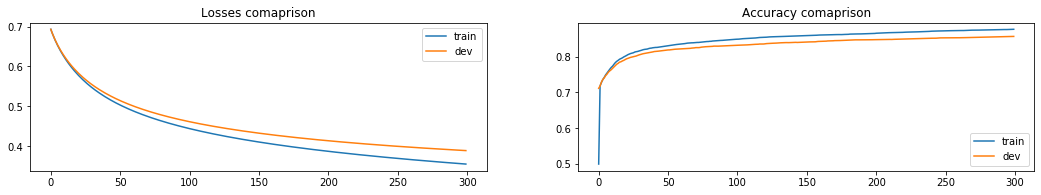

In [31]:
plt.figure(figsize=(18,6))
plt.subplot(221)
plt.plot(l.losses,label='train')
plt.plot(l.losses_dev,label='dev')
plt.legend()
plt.title('Losses comaprison')
plt.subplot(222)
plt.plot(l.accuracy_list,label='train')
plt.plot(l.accuracy_list_dev,label='dev')
plt.title('Accuracy comaprison')
plt.legend()

In [32]:
tokens=[X_train_matrix,X_dev_matrix,X_test_matrix,X_dev_b_matrix,X_test_b_matrix]
preds=predict(l,tokens)

print(accuracy_score(y_train,preds[0]))
print(accuracy_score(y_dev,preds[1]))
print(accuracy_score(y_dev_b,preds[3]))

(15000, 61880)
predict time for train is:  0.012124061584472656
(10000, 61880)
predict time for dev is:  0.00904393196105957
(25000, 61880)
predict time for test is:  0.01757216453552246
(2000, 61880)
predict time for dev-b is:  0.00038313865661621094
(8599, 61880)
predict time for test-b is:  0.0009179115295410156
0.8764666666666666
0.8565
0.688


In [0]:
result=to_df(preds)
result.to_csv('file2.tsv',index=False,header=False,sep='\t')

5it [00:13,  2.55s/it]


10. Try to set different learning rates.

*Question: Plot different training curves for different learning rate parameters. Which conclusions could be made on this?*

100%|██████████| 20000/20000 [07:12<00:00, 46.27it/s]


(15000, 61880)
predict time for train is:  0.011723518371582031
(10000, 61880)
predict time for dev is:  0.007051706314086914
(25000, 61880)
predict time for test is:  0.015428781509399414
(2000, 61880)
predict time for dev-b is:  0.0005366802215576172
(8599, 61880)
predict time for test-b is:  0.0010652542114257812
0.9887333333333334
0.8797
0.705


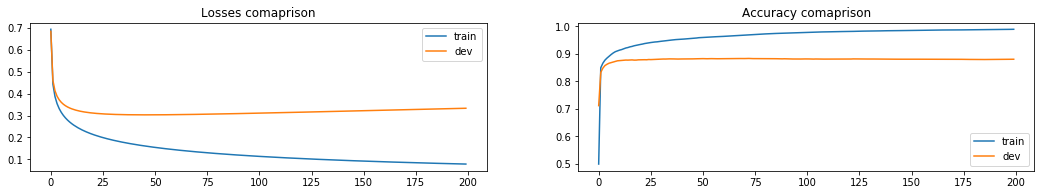

100%|██████████| 20000/20000 [07:09<00:00, 46.58it/s]


(15000, 61880)
predict time for train is:  0.009237289428710938
(10000, 61880)
predict time for dev is:  0.0066623687744140625
(25000, 61880)
predict time for test is:  0.01591348648071289
(2000, 61880)
predict time for dev-b is:  0.0003437995910644531
(8599, 61880)
predict time for test-b is:  0.0009696483612060547
0.9334666666666667
0.8778
0.709


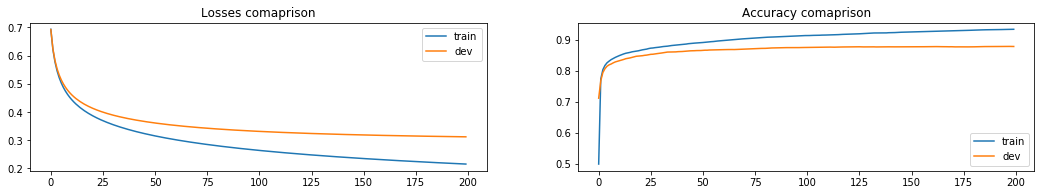

100%|██████████| 20000/20000 [07:13<00:00, 46.16it/s]


(15000, 61880)
predict time for train is:  0.009941816329956055
(10000, 61880)
predict time for dev is:  0.006947517395019531
(25000, 61880)
predict time for test is:  0.01579570770263672
(2000, 61880)
predict time for dev-b is:  0.00052642822265625
(8599, 61880)
predict time for test-b is:  0.00090789794921875
0.8653333333333333
0.8473
0.682


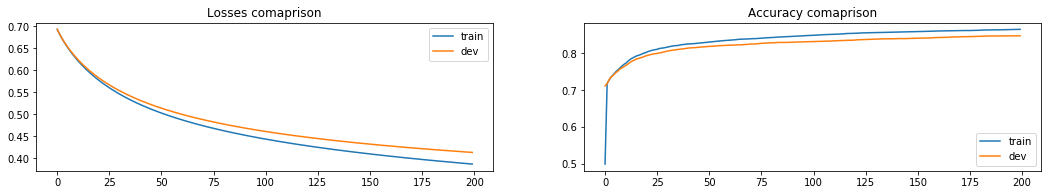

In [33]:
rates=[0.1,1e-2,1e-3]

predictions=[]
for lr in rates:
    plt.figure(figsize=(18,6))
    l_=LR(lr,20000,1e-5)
    l_.fit(X_train_matrix,y_train,X_dev_matrix,y_dev)
    preds=predict(l_,tokens)
    predictions.append(preds)
    print(accuracy_score(y_train,preds[0]))
    print(accuracy_score(y_dev,preds[1]))
    print(accuracy_score(y_dev_b,preds[3]))
    plt.subplot(221)
    plt.plot(l_.losses,label='train')
    plt.plot(l_.losses_dev,label='dev')
    plt.legend()
    plt.title('Losses comaprison')
    plt.subplot(222)
    plt.plot(l_.accuracy_list,label='train')
    plt.plot(l_.accuracy_list_dev,label='dev')
    plt.title('Accuracy comaprison')
    plt.legend()
    plt.show()

lr=1.e-3 is best

11. For $\alpha$ coefficient of $L_2$ regularizer we used a random value. Wrong/inappropriate $\alpha$ causes underfitting ($\alpha$ is too large) or overfitting ($\alpha$ is too small). Choose the appropriate $\alpha$ that helps to perform better on validation set. Be careful: $\alpha$ changes the objective fiunction, so it is possible that the learning rate and the number of epochs should be changed too. Use plots to choose the appropriate values!

_Question: plot training curves for several $\alpha$ values. What conclusions could be made? How many epochs and which learning rate do you need until it converges? How long does it take to train and to label test data?_

100%|██████████| 30000/30000 [10:34<00:00, 47.26it/s]


(15000, 61880)
predict time for train is:  0.009437799453735352
(10000, 61880)
predict time for dev is:  0.0071697235107421875
(25000, 61880)
predict time for test is:  0.015230894088745117
(2000, 61880)
predict time for dev-b is:  0.00038313865661621094
(8599, 61880)
predict time for test-b is:  0.0008668899536132812
0.8798666666666667
0.8603
0.687


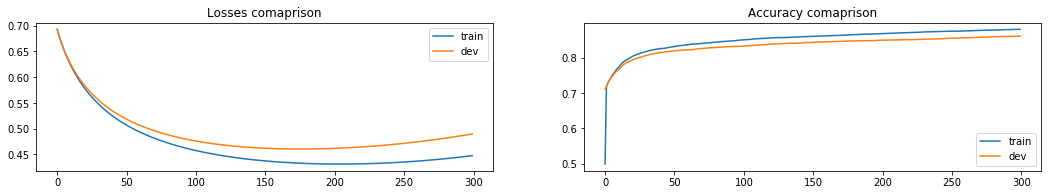

100%|██████████| 30000/30000 [10:29<00:00, 47.87it/s]


(15000, 61880)
predict time for train is:  0.01007986068725586
(10000, 61880)
predict time for dev is:  0.006269693374633789
(25000, 61880)
predict time for test is:  0.015590667724609375
(2000, 61880)
predict time for dev-b is:  0.0002567768096923828
(8599, 61880)
predict time for test-b is:  0.0008141994476318359
0.877
0.8572
0.689


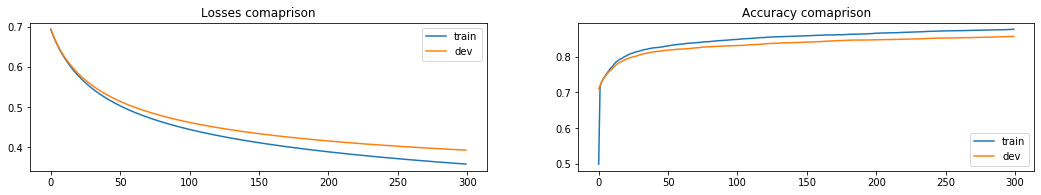

100%|██████████| 30000/30000 [10:22<00:00, 48.19it/s]


(15000, 61880)
predict time for train is:  0.010284423828125
(10000, 61880)
predict time for dev is:  0.0070497989654541016
(25000, 61880)
predict time for test is:  0.014958858489990234
(2000, 61880)
predict time for dev-b is:  0.00037360191345214844
(8599, 61880)
predict time for test-b is:  0.0009102821350097656
0.8764666666666666
0.8565
0.688


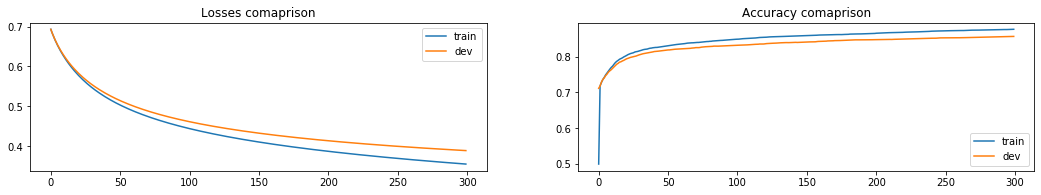

100%|██████████| 30000/30000 [10:17<00:00, 48.60it/s]


(15000, 61880)
predict time for train is:  0.0092315673828125
(10000, 61880)
predict time for dev is:  0.006432771682739258
(25000, 61880)
predict time for test is:  0.017792940139770508
(2000, 61880)
predict time for dev-b is:  0.0004050731658935547
(8599, 61880)
predict time for test-b is:  0.0009829998016357422
0.8764666666666666
0.8565
0.688


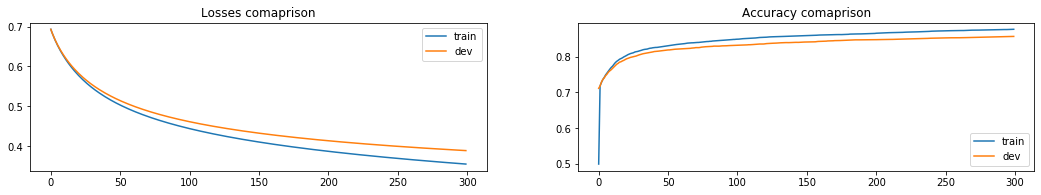

In [34]:
L2=[1e-2,1e-3,1e-5,1e-7]

predictions=[]
for alpha in L2:
    plt.figure(figsize=(18,6))
    l_a=LR(1e-3,30000,alpha)
    l_a.fit(X_train_matrix,y_train,X_dev_matrix,y_dev)
    preds=predict(l_a,tokens)
    predictions.append(preds)
    print(accuracy_score(y_train,preds[0]))
    print(accuracy_score(y_dev,preds[1]))
    print(accuracy_score(y_dev_b,preds[3]))
    plt.subplot(221)
    plt.plot(l_a.losses,label='train')
    plt.plot(l_a.losses_dev,label='dev')
    plt.legend()
    plt.title('Losses comaprison')
    plt.subplot(222)
    plt.plot(l_a.accuracy_list,label='train')
    plt.plot(l_a.accuracy_list_dev,label='dev')
    plt.title('Accuracy comaprison')
    plt.legend()
    plt.show()

as we can see 30000 epoch enough for train and not overfit model

12. Adding $n$-grams may significantly help to improve model performance. Try to define the approprate values for $n$, to get better performance. Take into account, that the hyperparamemters you have found for unigram model (learning rate, epochs number, $\alpha$) may not be appropriate (optimal) for the $n$-gram model. 


*Question: how much do $n$-grams improve the performance? Which hyperparameters you changed?*


for the same params ngram not really matter

In [0]:
def N_gram(token_list, N):
    tokens=[]
    for token in token_list:
        tokens.append([" ".join(token[idx:idx+i]) 
            for i in range(N[0],N[1]+1) 
            for idx in range(len(token)-i+1)])
    return tokens
train_ngram=N_gram(train_words,(1,3))
print('done')
dev_ngram=N_gram(dev_words,(1,3))
print('done')
test_ngram=N_gram(test_words,(1,3))
print('done')
dev_b_ngram=N_gram(dev_b_words,(1,3))
print('done')
test_b_ngram=N_gram(test_b_words,(1,3))
print('done')

done
done
done
done
done


In [0]:
#we need create new vocabualar func without concate
def vocabular_creator_new(data):
    voc = []
    for txt in data:
        voc.extend(txt)
    vocab = set(voc) 
    return vocab
train_ngram_dictionary = vocabular_creator_new(train_ngram)
len(train_ngram_dictionary)

3002190

In [0]:

X_train_matrix_ngram,voc,indp,ind,d=N_V_matrix_train(train_ngram,train_ngram_dictionary)

X_dev_matrix_ngram=N_V_matrix_test(dev_ngram,train_ngram_dictionary,voc,X_train_matrix_ngram.shape[1])    
X_test_matrix_ngram=N_V_matrix_test(test_ngram,train_ngram_dictionary,voc,X_train_matrix_ngram.shape[1])
X_dev_b_matrix_ngram=N_V_matrix_test(dev_b_ngram,train_ngram_dictionary,voc,X_train_matrix_ngram.shape[1])    
X_test_b_matrix_ngram=N_V_matrix_test(test_b_ngram,train_ngram_dictionary,voc,X_train_matrix_ngram.shape[1])

100%|███████████████████████████████████████████████████████████████████████████| 8599/8599 [00:00<00:00, 23109.85it/s]


In [0]:
# for learning a lot epoch it 's need a lot of time, 30 000 epochs for 4.5 hour, thats why i will learn it only 10
l_n=LR(1e-3,10000,1e-5)
l_n.fit(X_train_matrix_ngram,y_train,X_dev_matrix_ngram,y_dev)

100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [1:19:42<00:00,  1.99it/s]


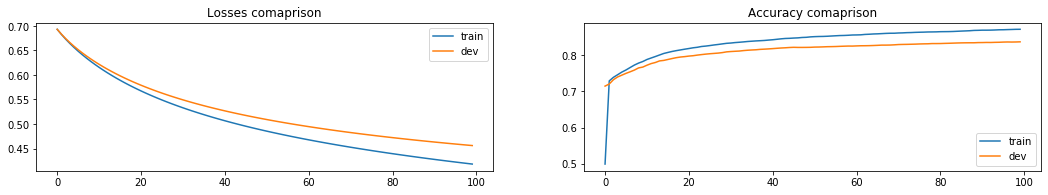

In [0]:
plt.figure(figsize=(18,6))
plt.subplot(221)
plt.plot(l_n.losses,label='train')
plt.plot(l_n.losses_dev,label='dev')
plt.legend()
plt.title('Losses comaprison')
plt.subplot(222)
plt.plot(l_n.accuracy_list,label='train')
plt.plot(l_n.accuracy_list_dev,label='dev')
plt.title('Accuracy comaprison')
plt.legend()

In [0]:
tokens=[X_train_matrix_ngram,X_dev_matrix_ngram,X_test_matrix_ngram,X_dev_b_matrix_ngram,X_test_b_matrix_ngram]
preds=predict(l_n,tokens)

print(accuracy_score(y_train,preds[0]))
print(accuracy_score(y_dev,preds[1]))
print(accuracy_score(y_dev_b,preds[3]))

(15000, 3002190)
predict time for train is:  0.1480426788330078
(10000, 3002190)
predict time for dev is:  0.05000948905944824
(25000, 3002190)
predict time for test is:  2.90348744392395
(2000, 3002190)
predict time for dev-b is:  0.25908327102661133
(8599, 3002190)
predict time for test-b is:  0.30005764961242676
0.8724
0.8377
0.676


13. Which features tend to be more significant (have max absolute values)? 

*Question: print 20 max features for positive and negative class*

In [0]:
positive_words = list(reversed(l.w.argsort()[-15:]))
negative_words = l.w.argsort()[:15]
inversed_vocabulary = {v:k for k,v in voc.items()}

In [0]:
for p in positive_words:
    print(inversed_vocabulary[p])

iconic
performing
none
storyline
dream
perfectly
path
impersonation
based
twister
westerns
empty
perfect
teased
opportunity


In [0]:
for p in negative_words:
    print(inversed_vocabulary[p])

luck
least
could
wonderful
book
even
stereotypes
accident
shattering
surprises
became
liners
turns
supermodels
unlikely


### 2.2 Feed-forward Neural Network

Implement neural network with $L$ layers ($L-1$ hidden layer) and train it at the _Large Movie Review_ dataset.

1. Repeat the steps 2.1.1 - 2.1.2 from the Logistic regression subsection.

In [13]:
import pandas as pd
from tqdm import tqdm
from sklearn.metrics import accuracy_score
from scipy.sparse import hstack
import numpy as np
from collections import Counter, defaultdict
import codecs
import matplotlib.pyplot as plt
import re
import seaborn as sns
import string
from time import time
%matplotlib inline

train_labels=pd.read_csv('FILIMDB/train.labels',header=None)
dev_labels=pd.read_csv('FILIMDB/dev.labels',header=None)
dev_labels_b=pd.read_csv('FILIMDB/dev-b.labels',header=None)


train=text_readers('FILIMDB/train.texts')
dev=text_readers('FILIMDB/dev.texts')
test=text_readers('FILIMDB/test.texts')
dev_b=text_readers('FILIMDB/dev-b.texts')
test_b=text_readers('FILIMDB/test-b.texts')

tokens_train = tokenization(preprocess_text(train,True,False))
tokens_dev =tokenization(preprocess_text(dev,True,False))
tokens_dev_b = tokenization(preprocess_text(dev_b,True,False))
tokens_test = tokenization(preprocess_text(test,True,False)) 
tokens_test_b = tokenization(preprocess_text(test_b,True,False))

train_words=[removeStopwords(sentences,stopWords) for sentences in tqdm(tokens_train)]
dev_words=[removeStopwords(sentences,stopWords) for sentences in tqdm(tokens_dev)]
dev_b_words=[removeStopwords(sentences,stopWords) for sentences in tqdm(tokens_dev_b)]
test_words=[removeStopwords(sentences,stopWords) for sentences in tqdm(tokens_test)]
test_b_words=[removeStopwords(sentences,stopWords) for sentences in tqdm(tokens_test_b)]

train_dictionary=vocabular_creator(train_words)

X_train_matrix,voc,indp,ind,d=N_V_matrix_train(train_words,train_dictionary)
X_dev_matrix=N_V_matrix_test(dev_words,train_dictionary,voc,X_train_matrix.shape[1])    
X_test_matrix=N_V_matrix_test(test_words,train_dictionary,voc,X_train_matrix.shape[1])
X_dev_b_matrix=N_V_matrix_test(dev_b_words,train_dictionary,voc,X_train_matrix.shape[1])    
X_test_b_matrix=N_V_matrix_test(test_b_words,train_dictionary,voc,X_train_matrix.shape[1])


y_train=train_labels[0].replace(['neg','pos'],[0,1])
y_dev=dev_labels[0].replace(['neg','pos'],[0,1])
y_dev_b=dev_labels_b[0].replace(['neg','pos'],[0,1])

100%|██████████| 8599/8599 [00:00<00:00, 135684.43it/s]


2. Implement Feed-forward Neural Network with **one** hidden layer using **pytorсh**.

In [0]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data_utils
import torch
import matplotlib.pyplot as plt
#%matplotlib inline
from classifier_ffnn import Feedforward

In [0]:
def get_batch(data:list,batch_size=500):
  if len(data)==2:
    X=data[0]
    y=data[1]
    for batch in range(int(len(y)/batch_size)):
      idx = batch*batch_size
      indexes = slice(idx, idx + batch_size)
      yield X[indexes], y[indexes]
  if len(data)==1:
    X=data[0]
    for batch in range(int(X.shape[0]/batch_size)):
      idx=batch*batch_size
      indexes=slice(idx,idx+batch_size)
      yield X[indexes]

In [0]:
criterion = torch.nn.BCEWithLogitsLoss()

model = Feedforward(X_train_matrix.shape[1],100).cuda()

# Use Adam optimizer
optimizer = optim.Adam(model.parameters())

4it [00:00, 31.72it/s]

epoch: 0


150it [00:04, 32.29it/s]


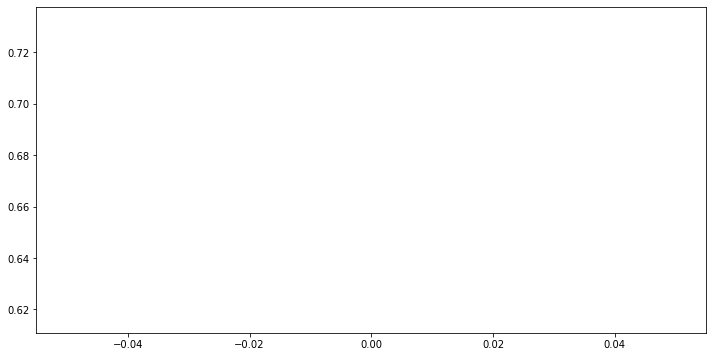

4it [00:00, 32.98it/s]

epoch: 1


150it [00:04, 32.33it/s]


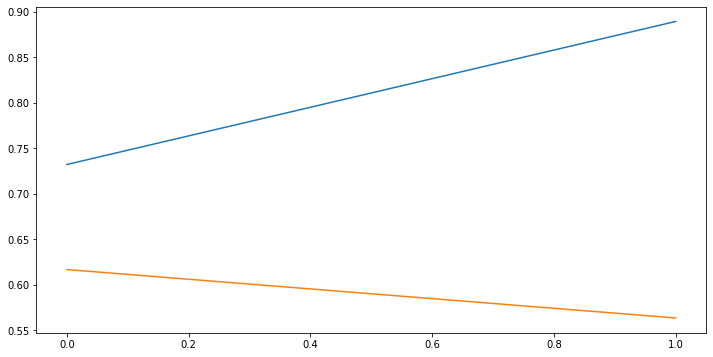

4it [00:00, 32.18it/s]

epoch: 2


150it [00:04, 32.38it/s]


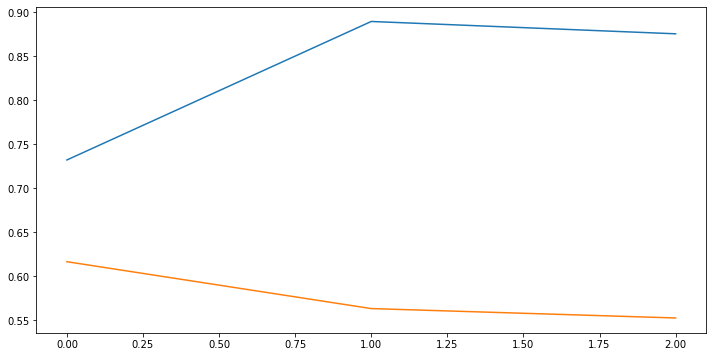

4it [00:00, 32.19it/s]

epoch: 3


150it [00:04, 32.17it/s]


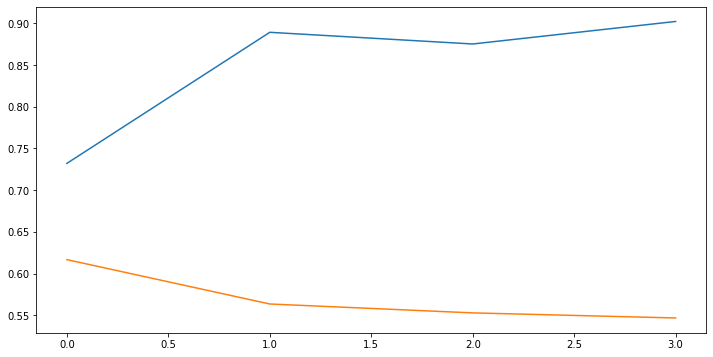

3it [00:00, 29.76it/s]

epoch: 4


150it [00:04, 32.21it/s]


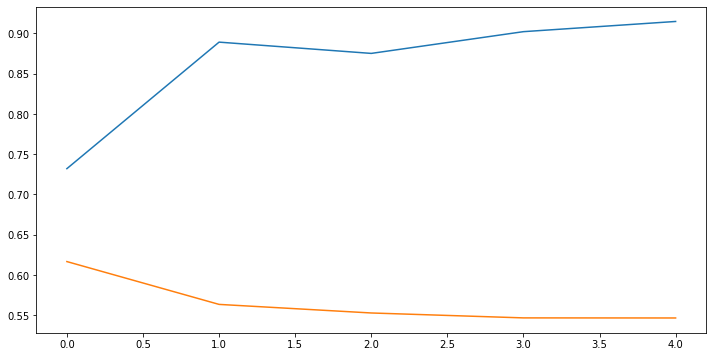

4it [00:00, 32.32it/s]

epoch: 5


150it [00:04, 32.31it/s]


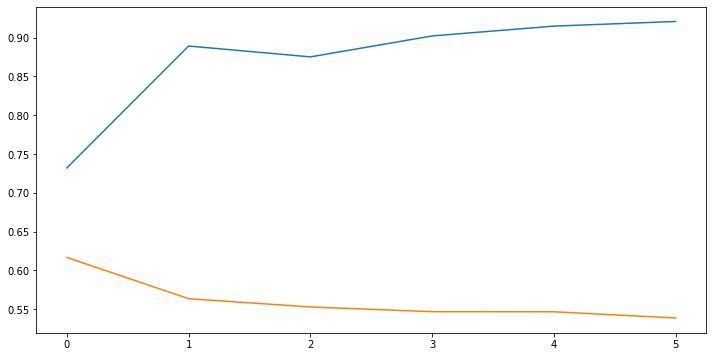

4it [00:00, 32.72it/s]

epoch: 6


150it [00:04, 32.76it/s]


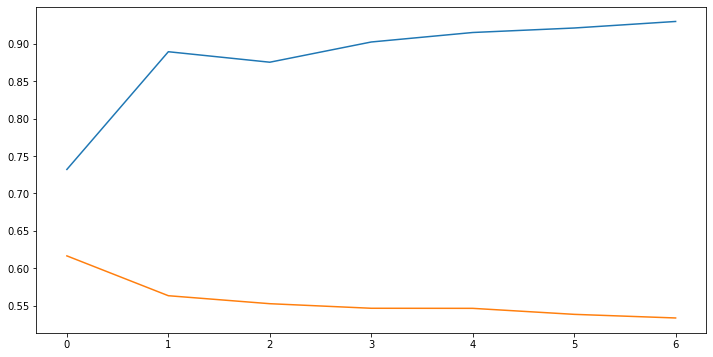

4it [00:00, 32.05it/s]

epoch: 7


150it [00:04, 32.50it/s]


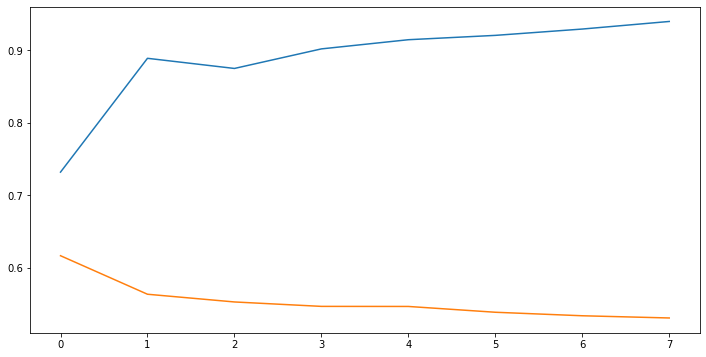

4it [00:00, 31.79it/s]

epoch: 8


150it [00:04, 32.63it/s]


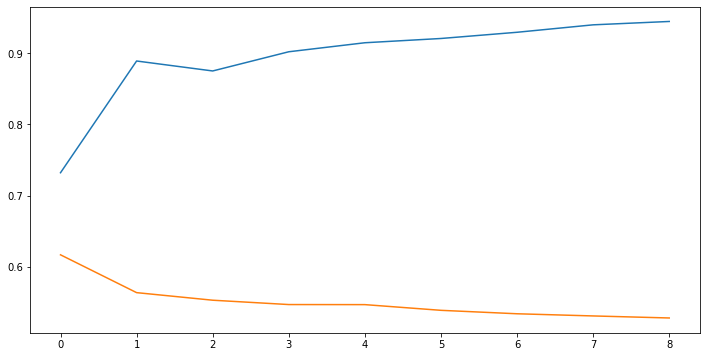

4it [00:00, 32.71it/s]

epoch: 9


150it [00:04, 32.37it/s]


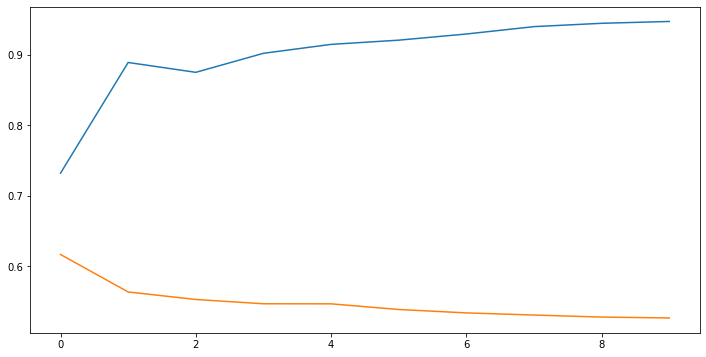

4it [00:00, 31.94it/s]

epoch: 10


150it [00:04, 32.12it/s]


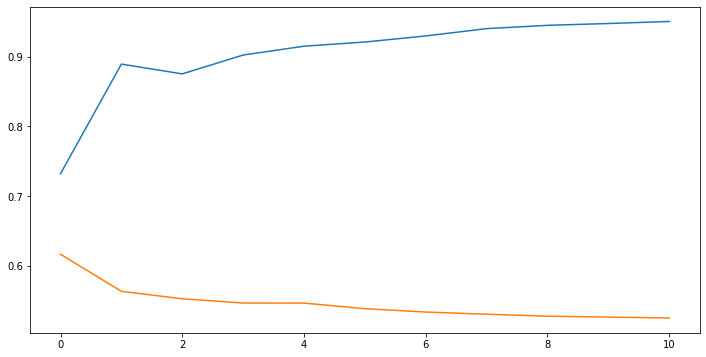

4it [00:00, 32.18it/s]

epoch: 11


150it [00:04, 32.27it/s]


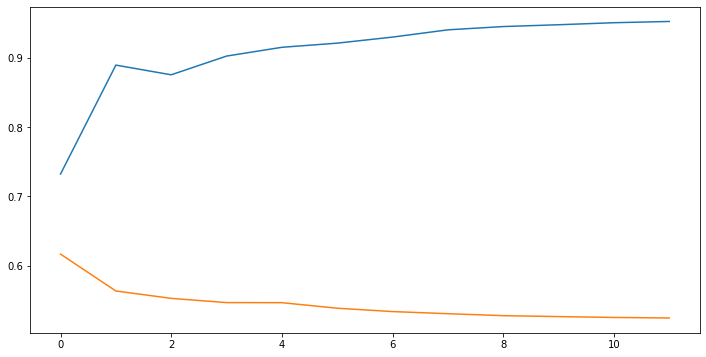

4it [00:00, 32.13it/s]

epoch: 12


150it [00:04, 32.13it/s]


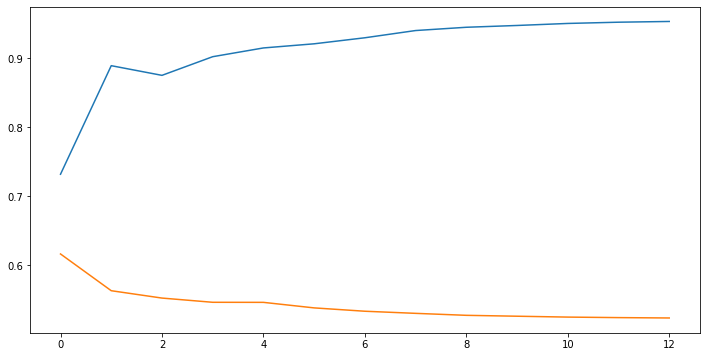

4it [00:00, 32.08it/s]

epoch: 13


150it [00:04, 32.01it/s]


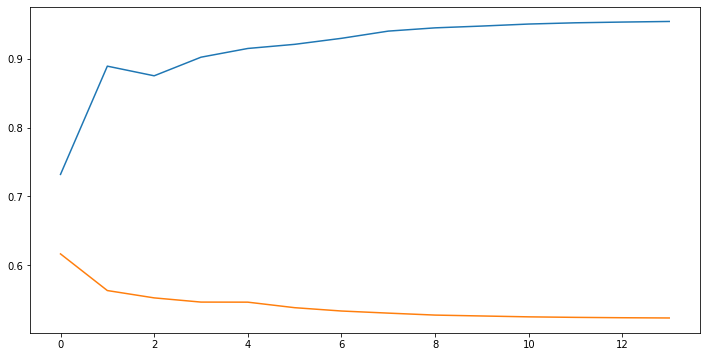

4it [00:00, 31.51it/s]

epoch: 14


150it [00:04, 32.15it/s]


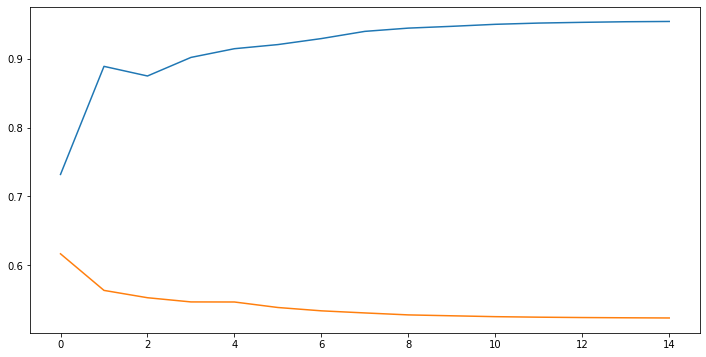

4it [00:00, 33.14it/s]

epoch: 15


150it [00:04, 32.69it/s]


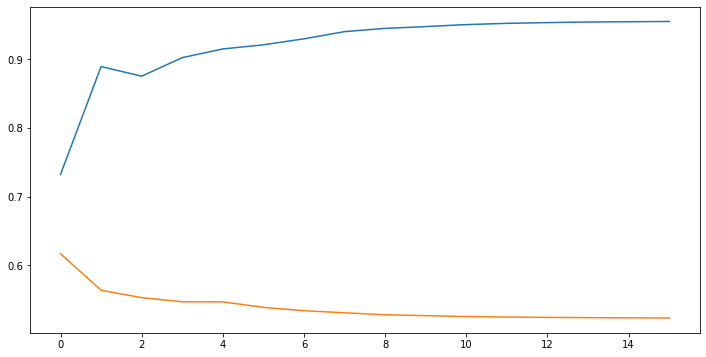

4it [00:00, 32.66it/s]

epoch: 16


150it [00:04, 32.45it/s]


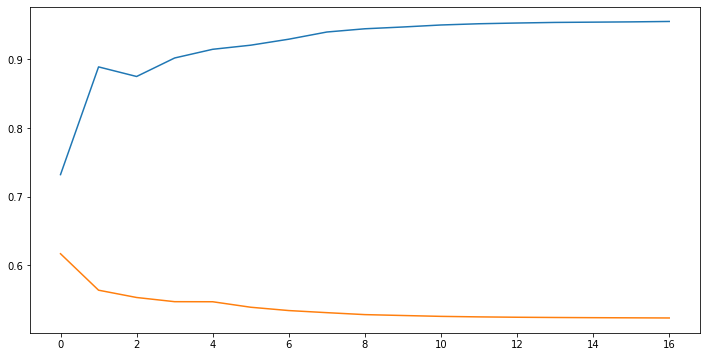

4it [00:00, 32.65it/s]

epoch: 17


150it [00:04, 32.48it/s]


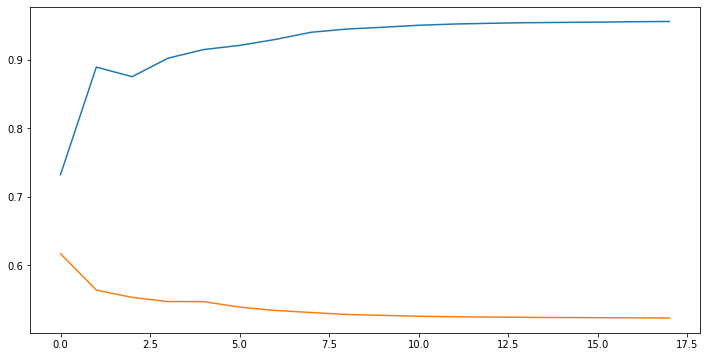

4it [00:00, 33.01it/s]

epoch: 18


150it [00:04, 32.54it/s]


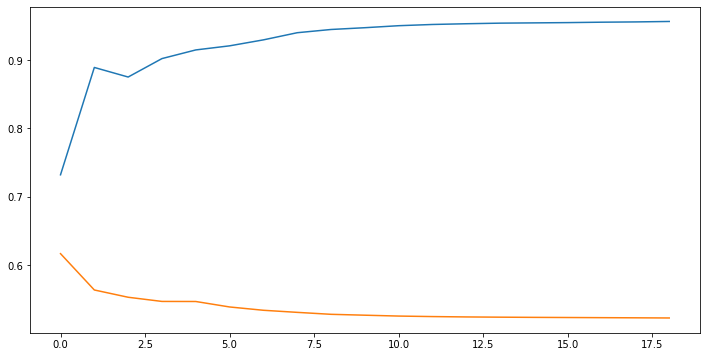

4it [00:00, 31.53it/s]

epoch: 19


150it [00:04, 32.42it/s]


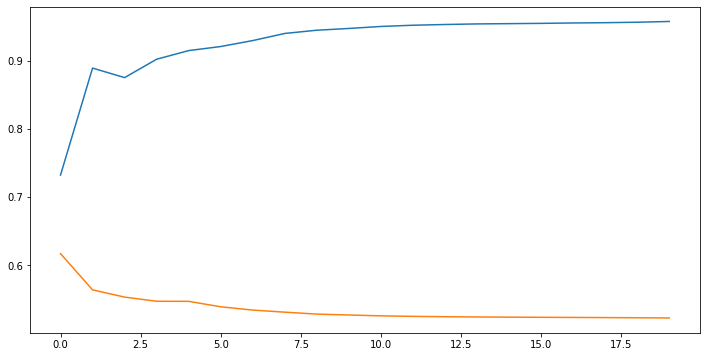

4it [00:00, 33.18it/s]

epoch: 20


150it [00:04, 32.36it/s]


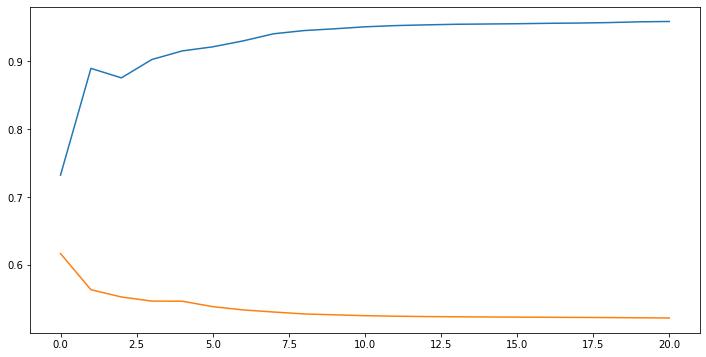

4it [00:00, 32.65it/s]

epoch: 21


150it [00:04, 32.46it/s]


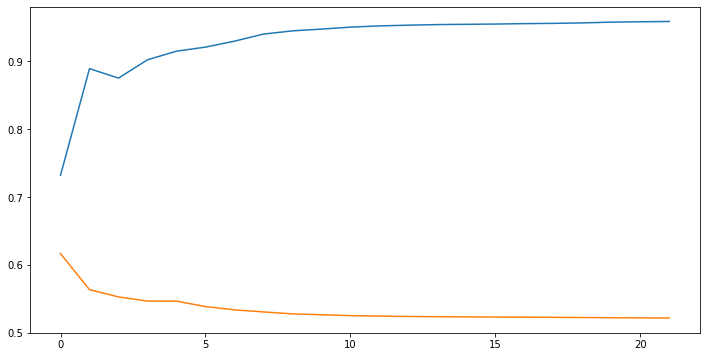

3it [00:00, 29.90it/s]

epoch: 22


150it [00:04, 32.14it/s]


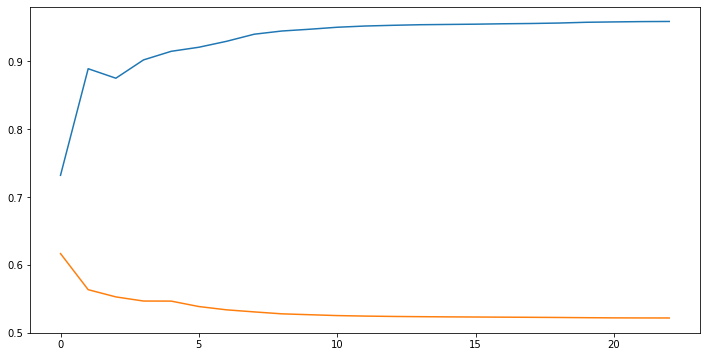

4it [00:00, 31.18it/s]

epoch: 23


150it [00:04, 32.29it/s]


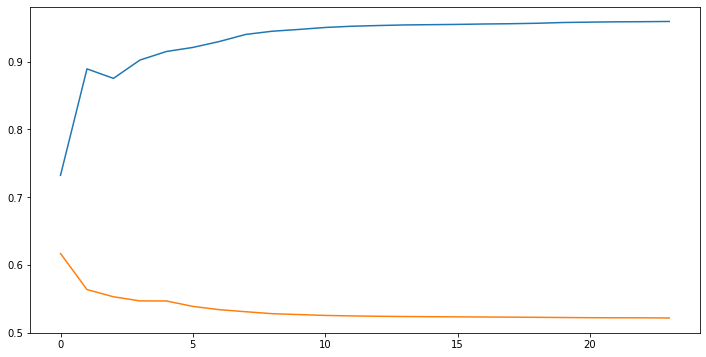

4it [00:00, 32.78it/s]

epoch: 24


150it [00:04, 32.61it/s]


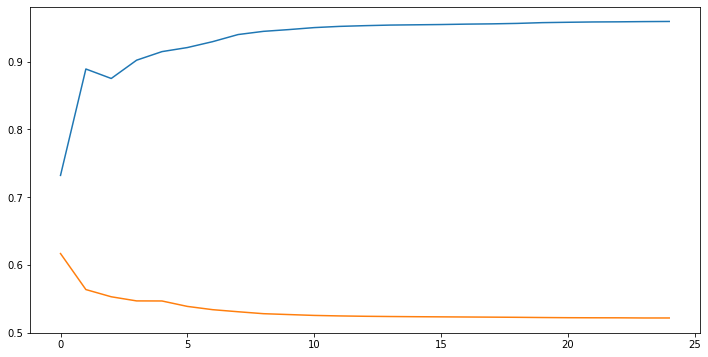

4it [00:00, 32.06it/s]

epoch: 25


150it [00:04, 32.40it/s]


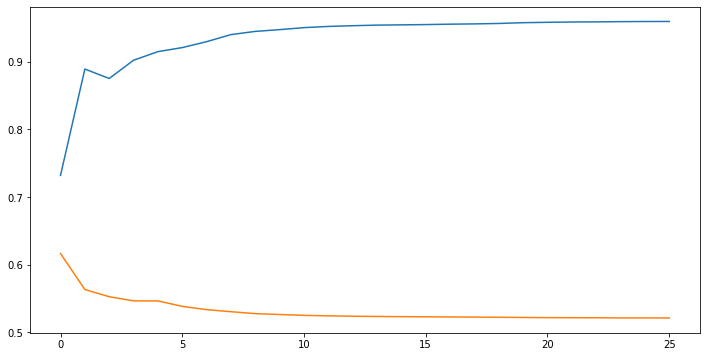

4it [00:00, 33.23it/s]

epoch: 26


150it [00:04, 32.63it/s]


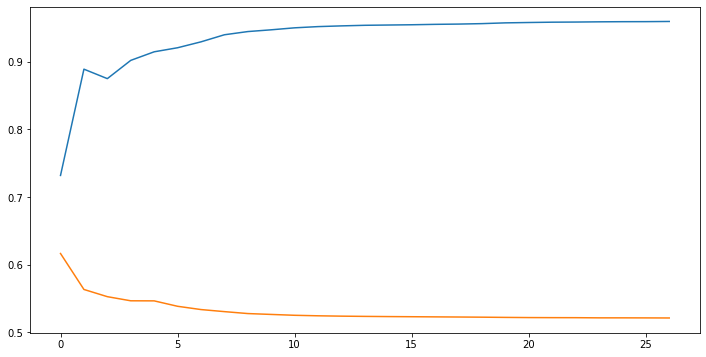

4it [00:00, 31.88it/s]

epoch: 27


150it [00:04, 32.34it/s]


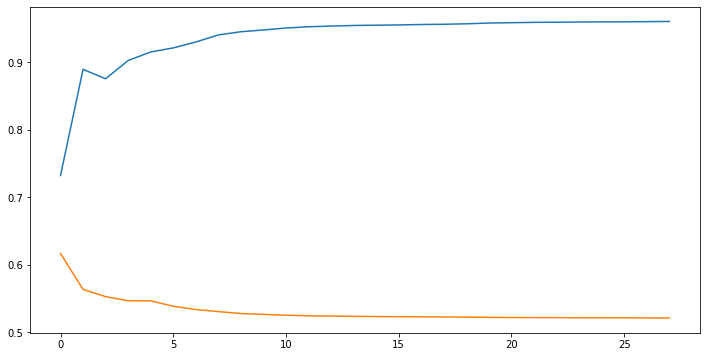

4it [00:00, 31.01it/s]

epoch: 28


150it [00:04, 32.35it/s]


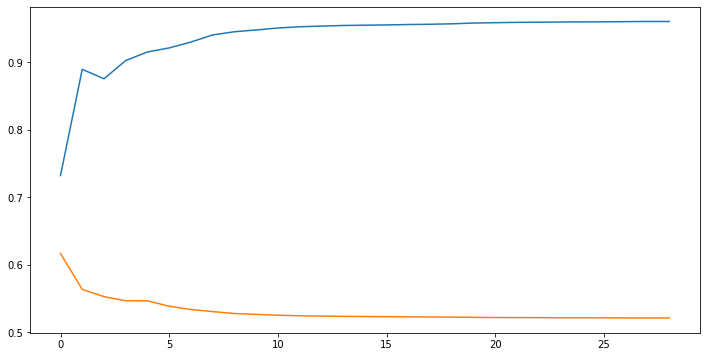

4it [00:00, 33.26it/s]

epoch: 29


150it [00:04, 32.47it/s]


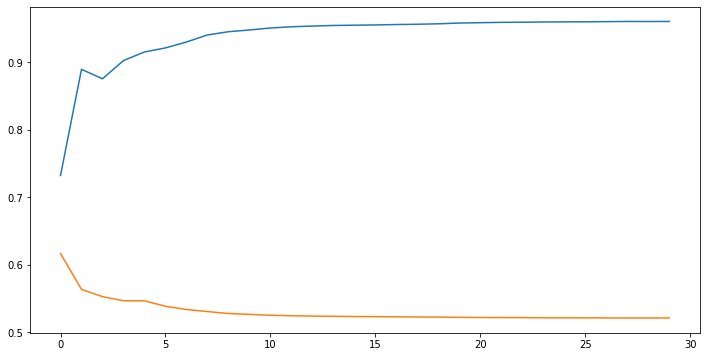

4it [00:00, 32.42it/s]

epoch: 30


150it [00:04, 32.59it/s]


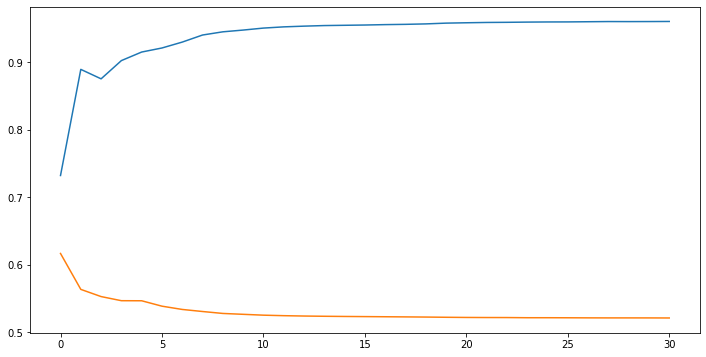

4it [00:00, 31.36it/s]

epoch: 31


150it [00:04, 32.79it/s]


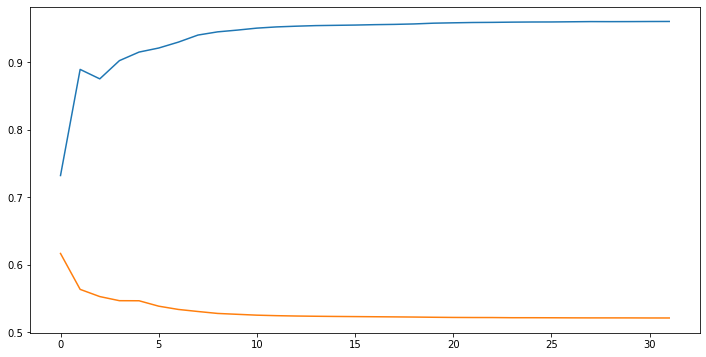

4it [00:00, 31.63it/s]

epoch: 32


150it [00:04, 32.46it/s]


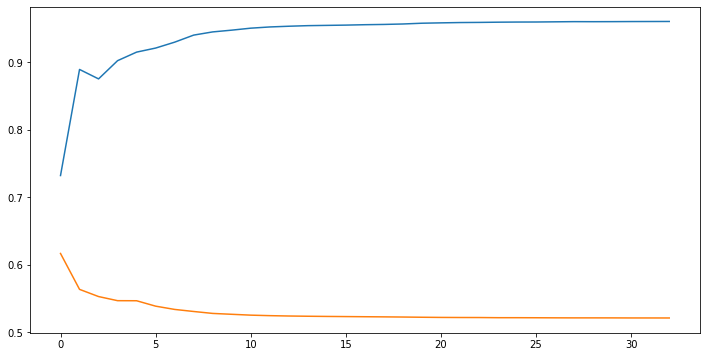

4it [00:00, 31.65it/s]

epoch: 33


150it [00:04, 32.38it/s]


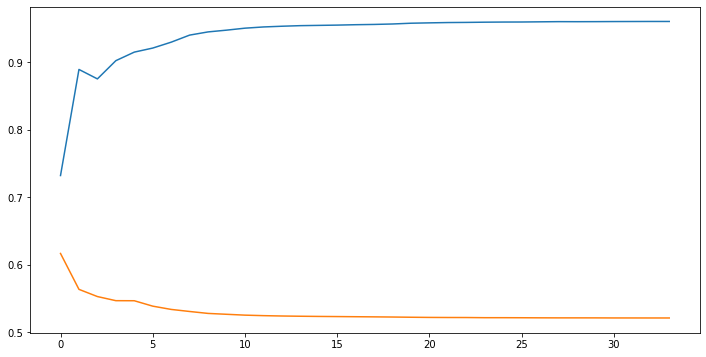

4it [00:00, 32.14it/s]

epoch: 34


150it [00:04, 32.54it/s]


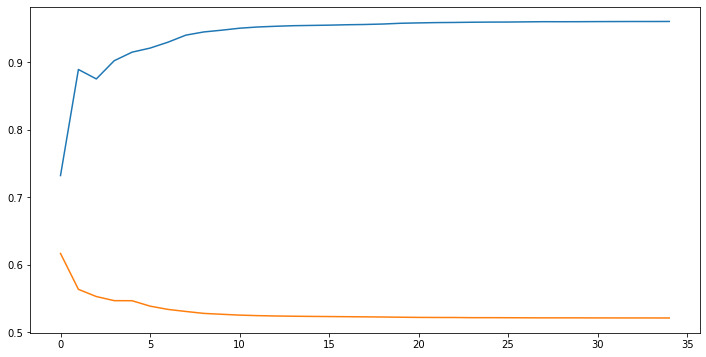

4it [00:00, 32.87it/s]

epoch: 35


150it [00:04, 32.59it/s]


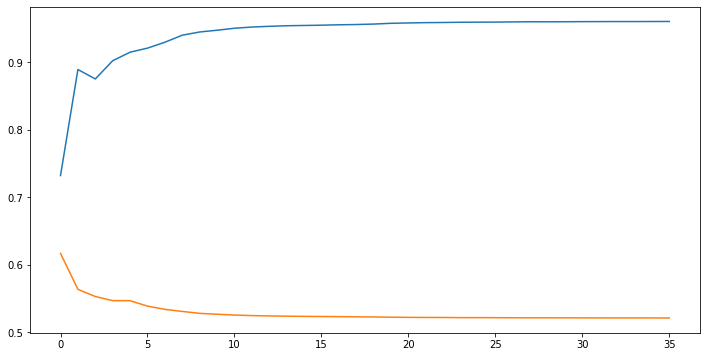

4it [00:00, 33.26it/s]

epoch: 36


150it [00:04, 32.75it/s]


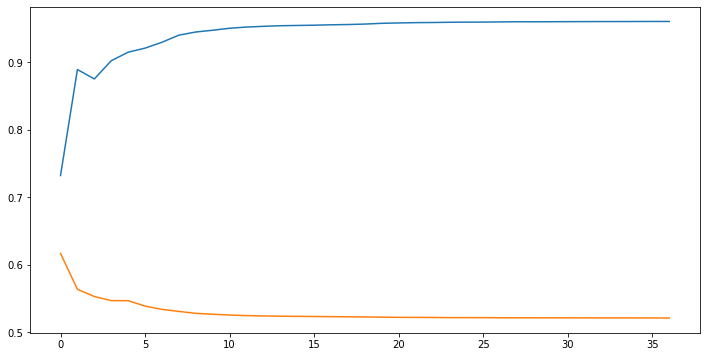

4it [00:00, 31.82it/s]

epoch: 37


150it [00:04, 32.74it/s]


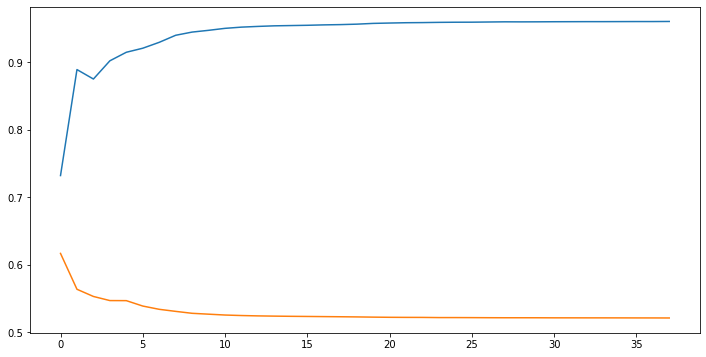

4it [00:00, 32.28it/s]

epoch: 38


150it [00:04, 32.79it/s]


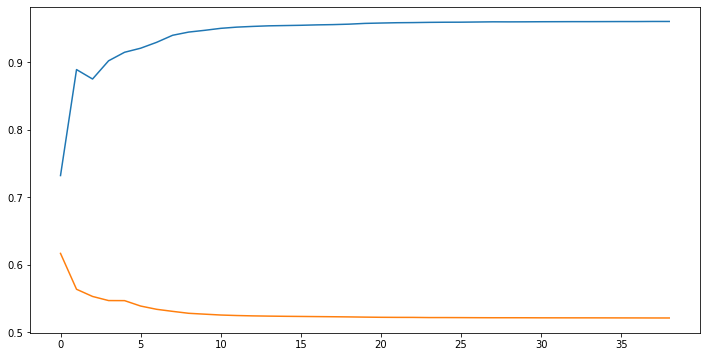

4it [00:00, 33.28it/s]

epoch: 39


150it [00:04, 32.79it/s]


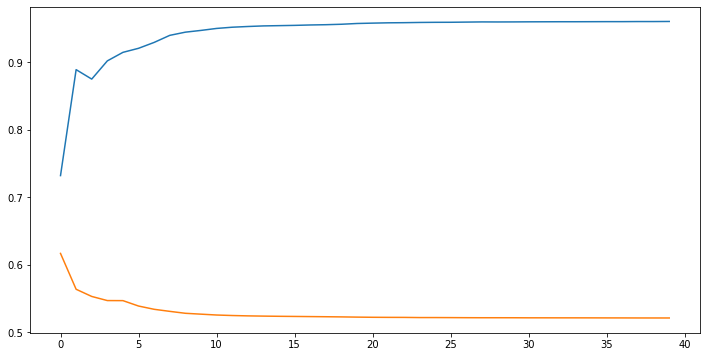

4it [00:00, 33.25it/s]

epoch: 40


150it [00:04, 32.81it/s]


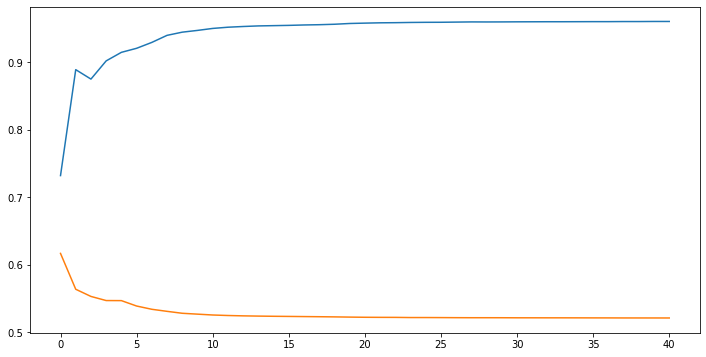

4it [00:00, 32.27it/s]

epoch: 41


150it [00:04, 32.26it/s]


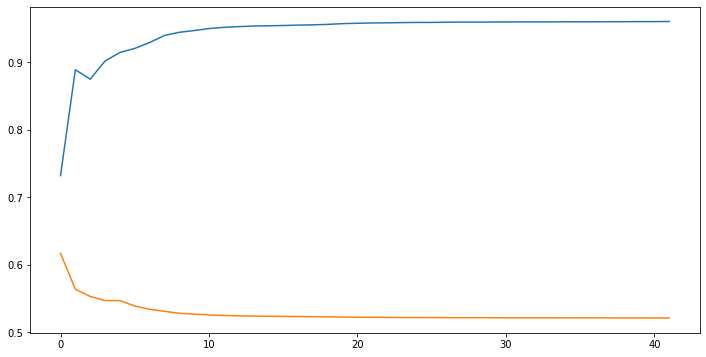

4it [00:00, 31.24it/s]

epoch: 42


150it [00:04, 32.21it/s]


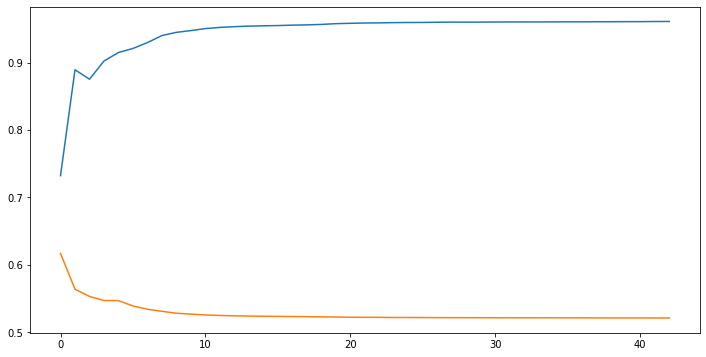

4it [00:00, 32.56it/s]

epoch: 43


150it [00:04, 32.75it/s]


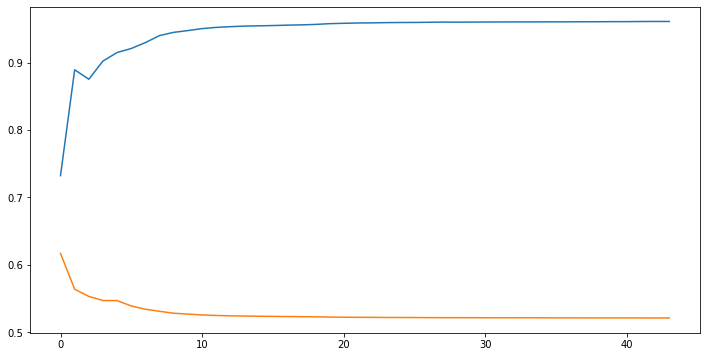

4it [00:00, 32.56it/s]

epoch: 44


150it [00:04, 32.57it/s]


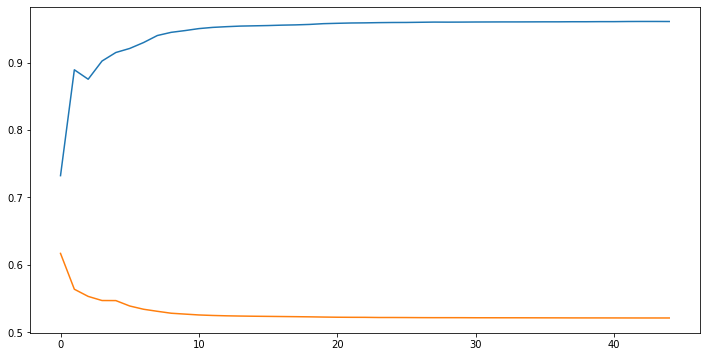

4it [00:00, 32.41it/s]

epoch: 45


150it [00:04, 32.58it/s]


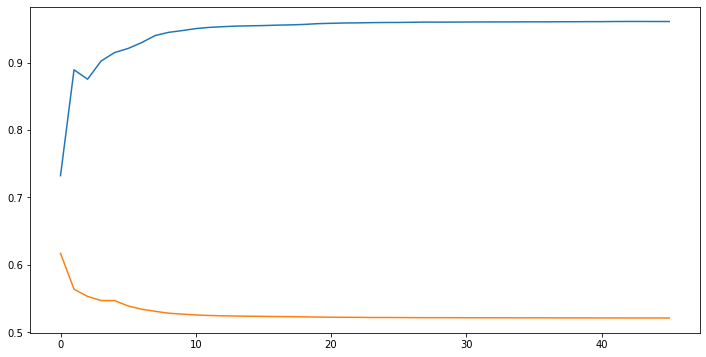

4it [00:00, 33.48it/s]

epoch: 46


150it [00:04, 32.72it/s]


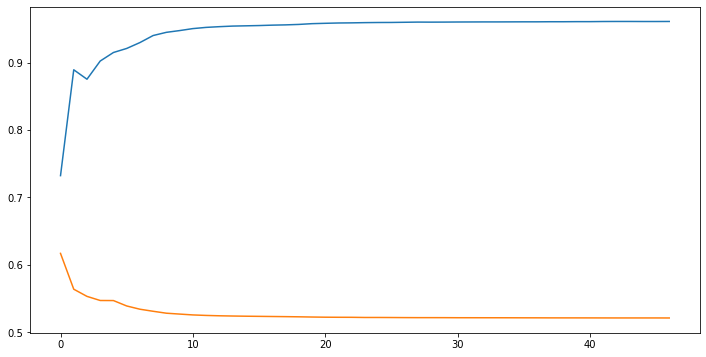

4it [00:00, 32.86it/s]

epoch: 47


150it [00:04, 32.35it/s]


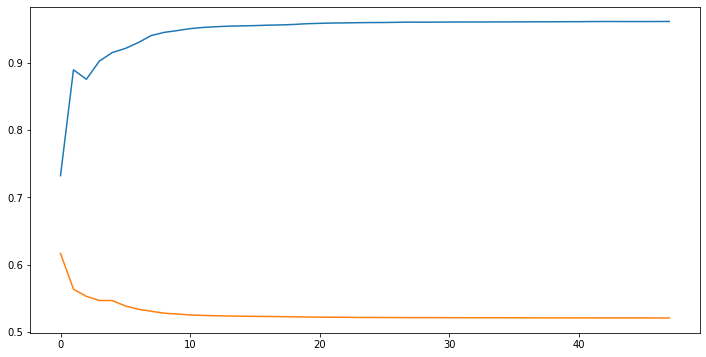

4it [00:00, 32.18it/s]

epoch: 48


150it [00:04, 32.52it/s]


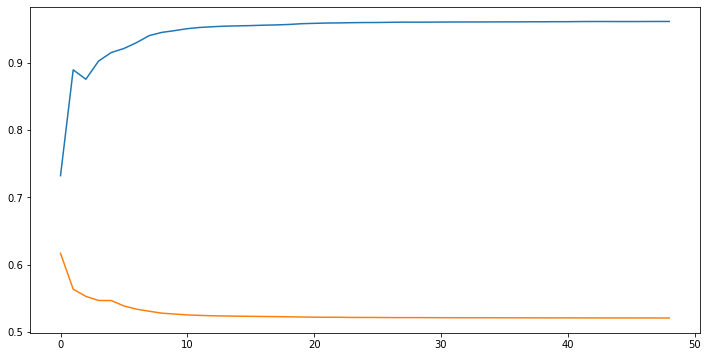

4it [00:00, 32.90it/s]

epoch: 49


150it [00:04, 32.80it/s]


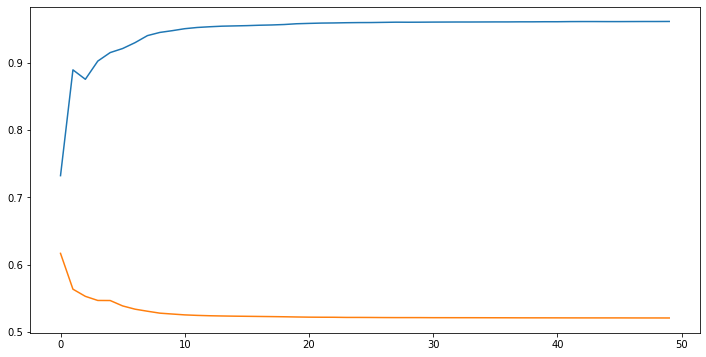

In [32]:
from tqdm import tqdm

epoch=50
train_losses=[]

train_accuracy=[]


for i in range((epoch)):
  loader=get_batch([X_train_matrix,y_train],batch_size=100)
  print('epoch:',i)
  model.train(True)
  loss_epoch=[]
  accuracy_epoch=[]
  for x_batch,y_batch in tqdm(loader):

    x_batch = torch.from_numpy(x_batch.todense()).float()
    #x_batch
    y_batch = torch.from_numpy(np.array(y_batch)).float()
    X_batch=Variable(x_batch).cuda()
    Y_batch=Variable(y_batch).cuda()
    prediction=model(X_batch)
    #print('y')
    # print(Y_batch)
    prediction=prediction.reshape(-1)
    loss=criterion(prediction,Y_batch)
    #print(loss)
    loss.backward()
    optimizer.step()
    #optimizer.zero_grad()
    loss_epoch.append(loss.data.cpu().numpy())
    #print(loss_epoch)
    accuracy_epoch.append(accuracy_score(prediction.detach().cpu().numpy().round(),Y_batch.detach().cpu().numpy()))
  model.train(False)
  train_losses.append(np.mean(loss_epoch))
  train_accuracy.append(np.mean(accuracy_epoch))
  plt.figure(figsize=(12, 6))

  plt.plot(train_accuracy,label='accuracy')
  plt.plot(train_losses,label='loss')
  plt.show()

In [56]:
def prediction(model,data):
  preds=[]
  model.eval()
  loader=get_batch([data],batch_size=1)
  for test_batch in loader:
    x_batch = torch.from_numpy(test_batch.todense()).float()
    x_batch=Variable(x_batch).cuda()
    predictions = model(x_batch)
    predictions=predictions.reshape(-1)
    preds.append(predictions.detach().cpu().numpy().round())
  y_pred=np.concatenate(preds)
  return y_pred
y_pred_train=prediction(model,X_train_matrix)
y_pred_dev=prediction(model,X_dev_matrix)  
y_pred_dev_b=prediction(model,X_dev_b_matrix)
y_pred_test=prediction(model,X_test_matrix)
y_pred_test_b=prediction(model,X_test_b_matrix)
print('train_accuracy',accuracy_score(y_pred_train,y_train))
print('dev_accuracy',accuracy_score(y_pred_dev,y_dev))
print('dev_b_accuracy',accuracy_score(y_pred_dev_b,y_dev_b))

train_accuracy 0.9610666666666666
dev_accuracy 0.862
dev_b_accuracy 0.7


In [57]:
len(y_pred_test_b)


8599

In [58]:
preds=[y_pred_train,y_pred_dev,y_pred_test,y_pred_dev_b,y_pred_test_b]

result=to_df(preds)
result.to_csv('file2.tsv',index=False,header=False,sep='\t')

5it [00:05,  1.13it/s]


3. Similarly to 2.1.10 and 2.1.11, do the finetuning for the learning rate and $\alpha$ coefficient of $L_2$ regularizer hyperparameters on validation set.


_Question: What is the optimal value of $\alpha$? of learning rate? How many epoch does it take to converge?_


In [0]:
criterion = torch.nn.BCEWithLogitsLoss()

model = Feedforward(X_train_matrix.shape[1],100).cuda()

# Use Adam optimizer
optimizer = optim.Adam(model.parameters(),weight_decay=1e-4)

4it [00:00, 31.53it/s]

epoch: 0


150it [00:04, 32.28it/s]


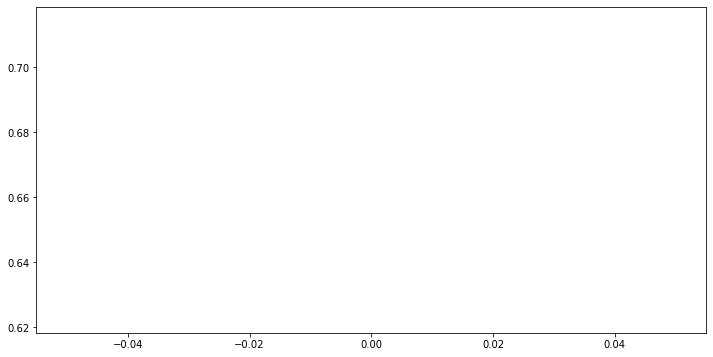

4it [00:00, 31.80it/s]

epoch: 1


150it [00:04, 31.83it/s]


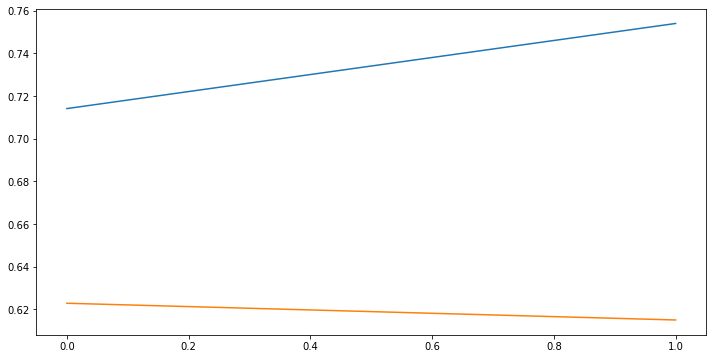

4it [00:00, 31.66it/s]

epoch: 2


150it [00:04, 31.88it/s]


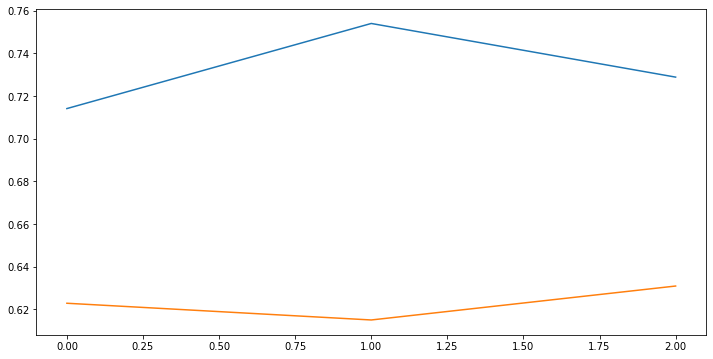

4it [00:00, 33.03it/s]

epoch: 3


150it [00:04, 32.44it/s]


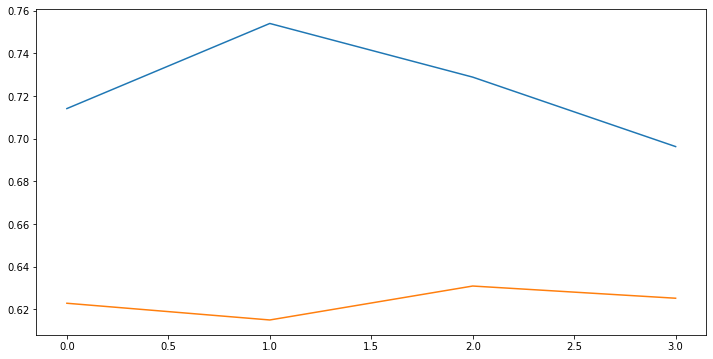

4it [00:00, 31.88it/s]

epoch: 4


150it [00:04, 32.43it/s]


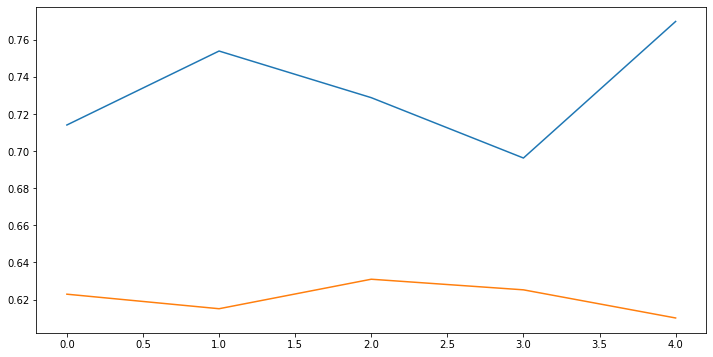

4it [00:00, 32.27it/s]

epoch: 5


150it [00:04, 32.49it/s]


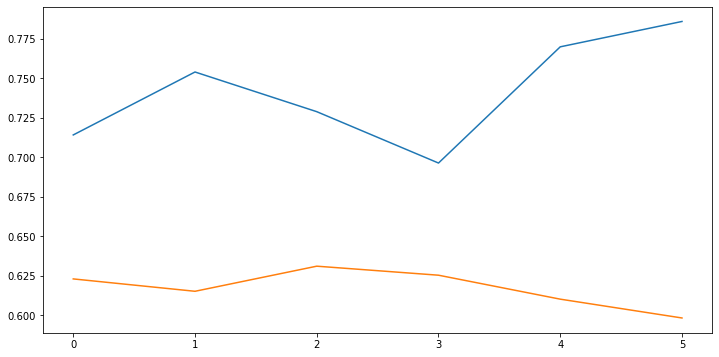

4it [00:00, 32.31it/s]

epoch: 6


150it [00:04, 32.20it/s]


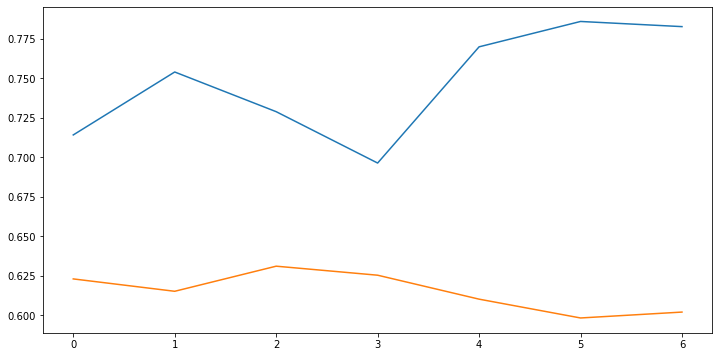

4it [00:00, 31.91it/s]

epoch: 7


150it [00:04, 32.53it/s]


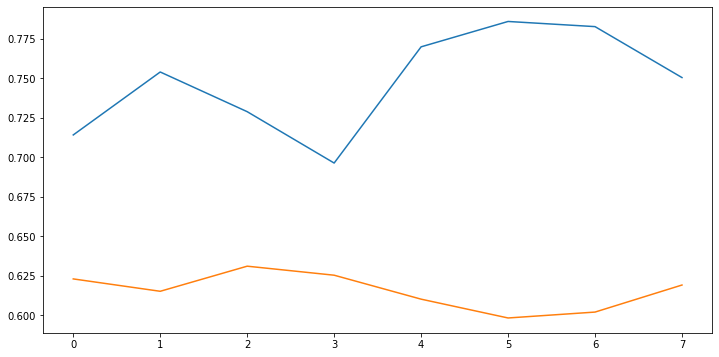

4it [00:00, 31.32it/s]

epoch: 8


150it [00:04, 32.43it/s]


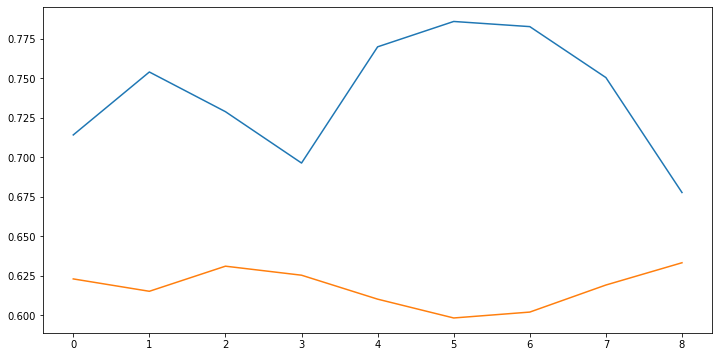

4it [00:00, 33.02it/s]

epoch: 9


150it [00:04, 32.28it/s]


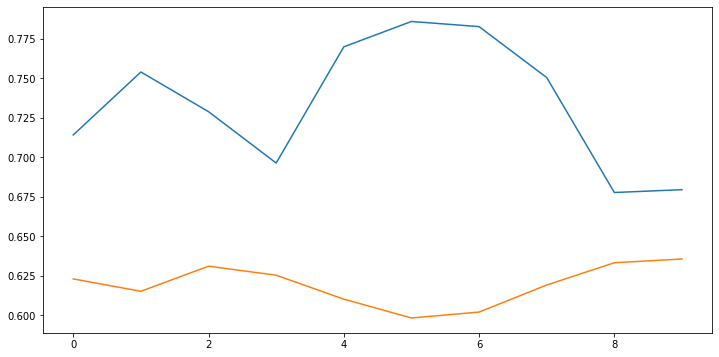

4it [00:00, 31.37it/s]

epoch: 10


150it [00:04, 32.23it/s]


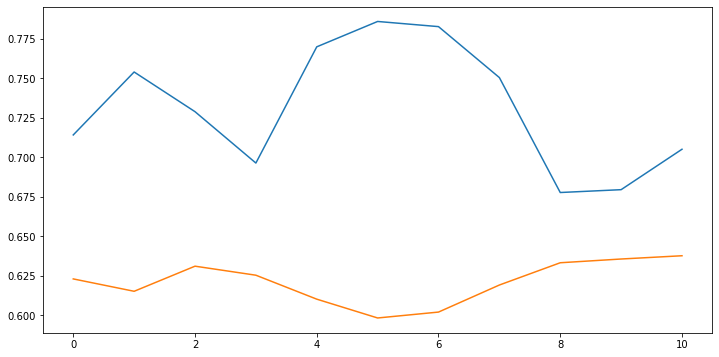

4it [00:00, 31.21it/s]

epoch: 11


150it [00:04, 32.65it/s]


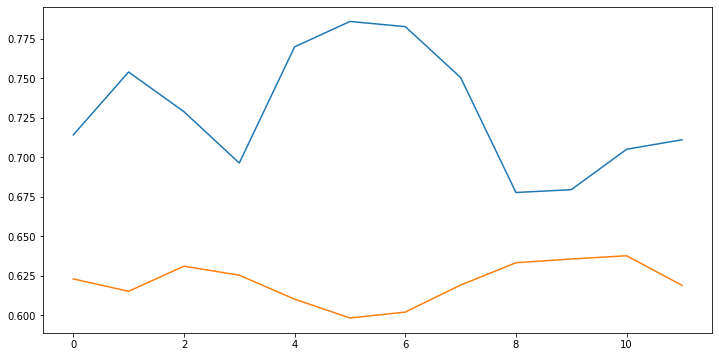

4it [00:00, 33.10it/s]

epoch: 12


150it [00:04, 32.53it/s]


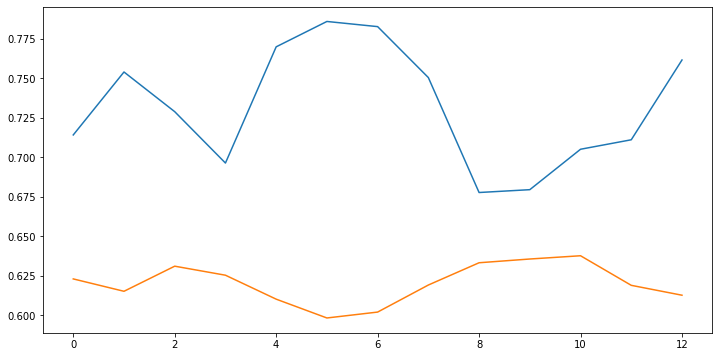

4it [00:00, 32.46it/s]

epoch: 13


150it [00:04, 32.61it/s]


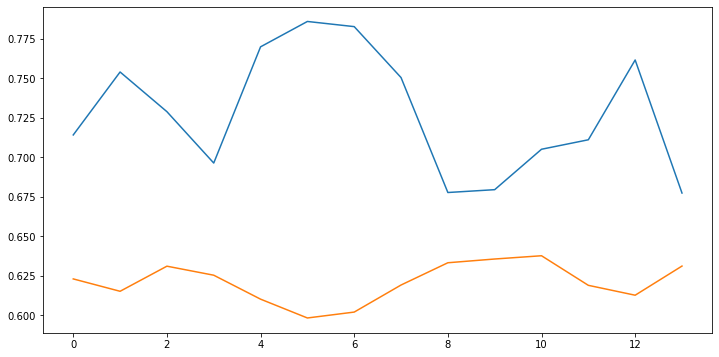

4it [00:00, 32.97it/s]

epoch: 14


150it [00:04, 32.44it/s]


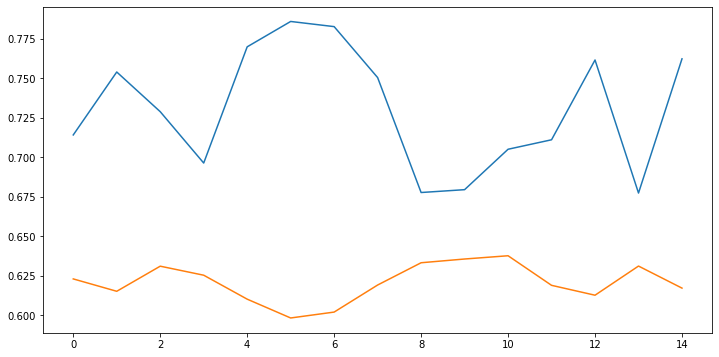

4it [00:00, 33.29it/s]

epoch: 15


150it [00:04, 32.27it/s]


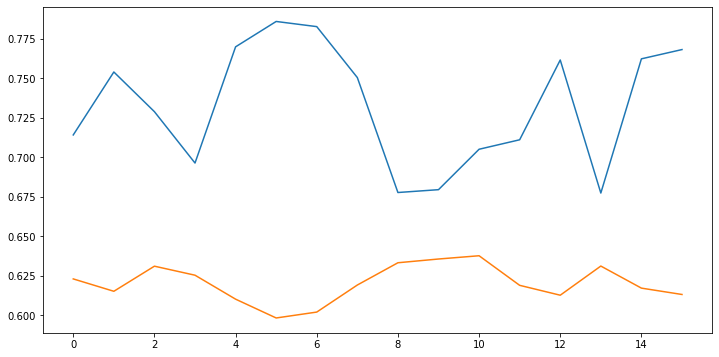

4it [00:00, 30.60it/s]

epoch: 16


150it [00:04, 32.37it/s]


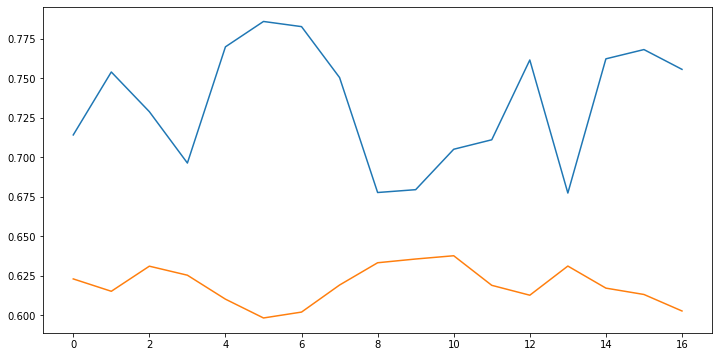

4it [00:00, 33.07it/s]

epoch: 17


150it [00:04, 32.48it/s]


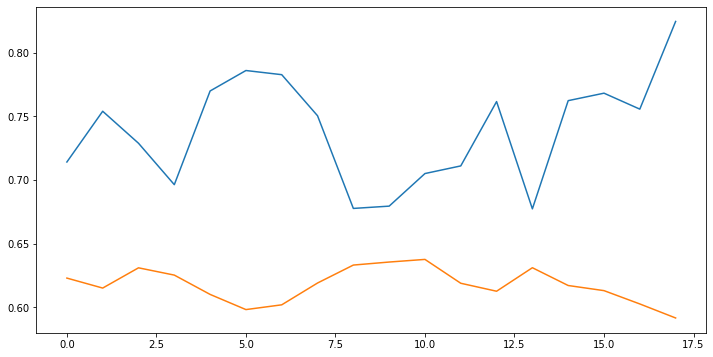

4it [00:00, 32.81it/s]

epoch: 18


150it [00:04, 32.43it/s]


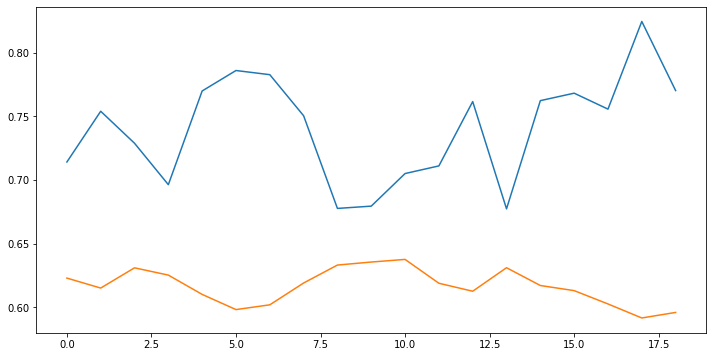

4it [00:00, 33.15it/s]

epoch: 19


150it [00:04, 32.55it/s]


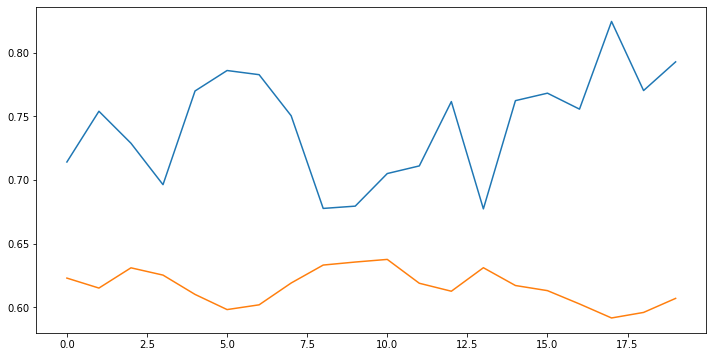

4it [00:00, 32.87it/s]

epoch: 20


150it [00:04, 32.54it/s]


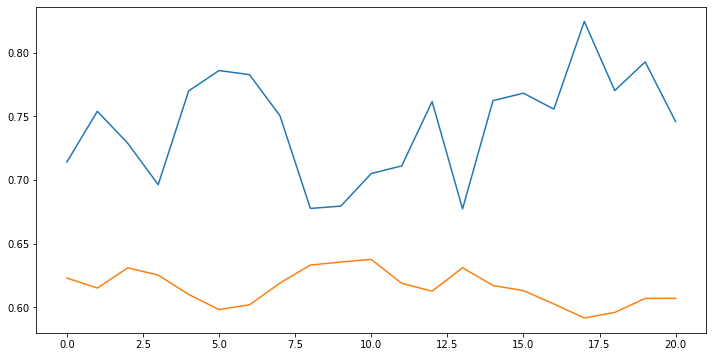

4it [00:00, 32.12it/s]

epoch: 21


150it [00:04, 32.12it/s]


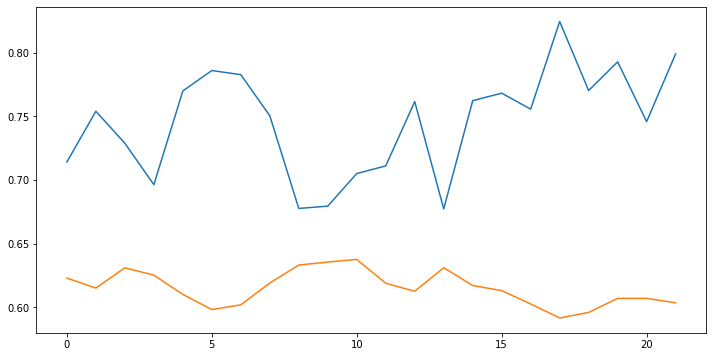

4it [00:00, 31.80it/s]

epoch: 22


150it [00:04, 32.29it/s]


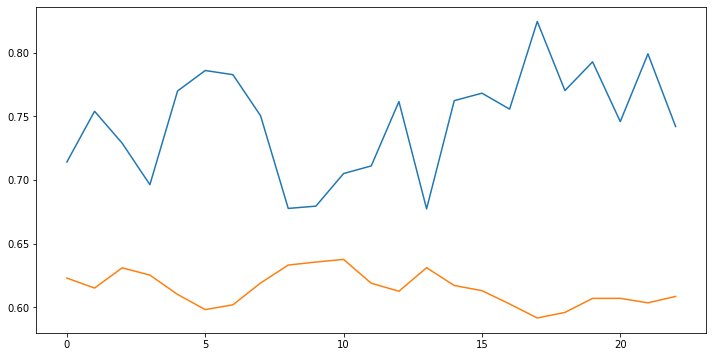

4it [00:00, 31.09it/s]

epoch: 23


150it [00:04, 32.28it/s]


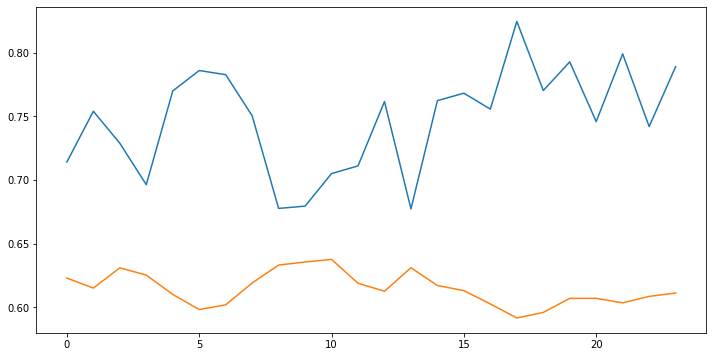

4it [00:00, 33.26it/s]

epoch: 24


150it [00:04, 32.53it/s]


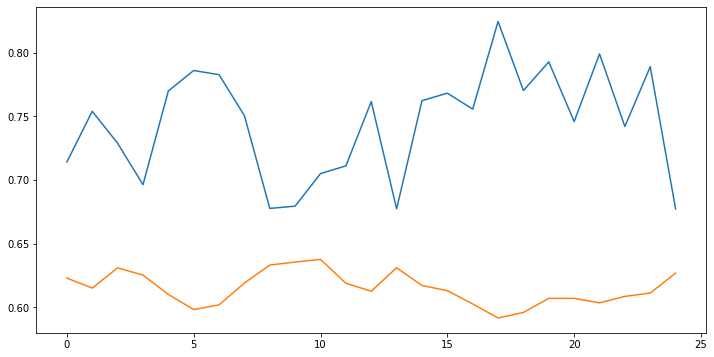

4it [00:00, 32.44it/s]

epoch: 25


150it [00:04, 32.81it/s]


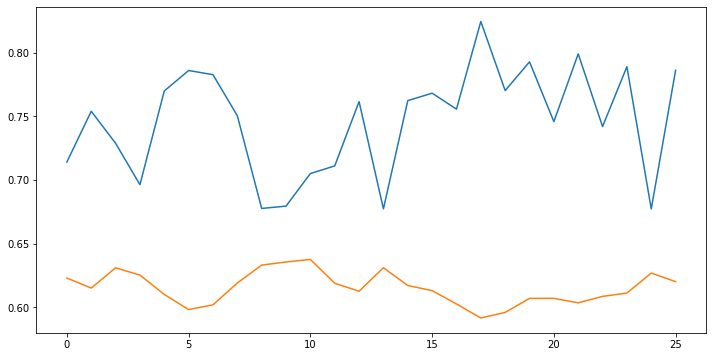

4it [00:00, 32.68it/s]

epoch: 26


150it [00:04, 32.43it/s]


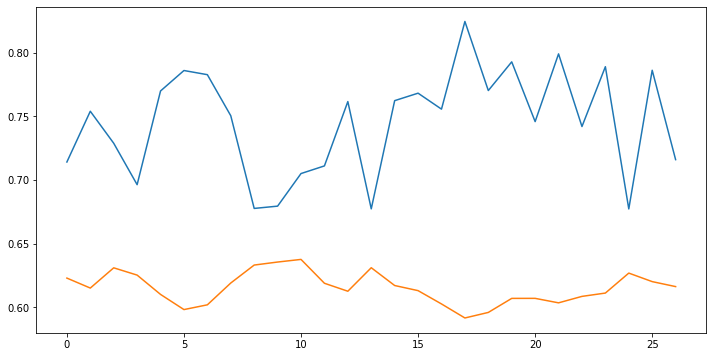

4it [00:00, 31.96it/s]

epoch: 27


150it [00:04, 32.58it/s]


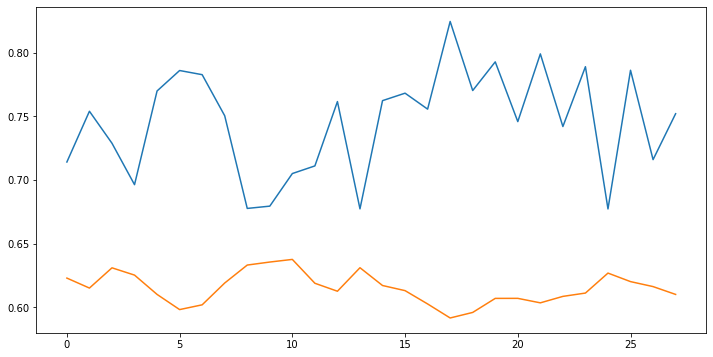

4it [00:00, 32.32it/s]

epoch: 28


150it [00:04, 32.68it/s]


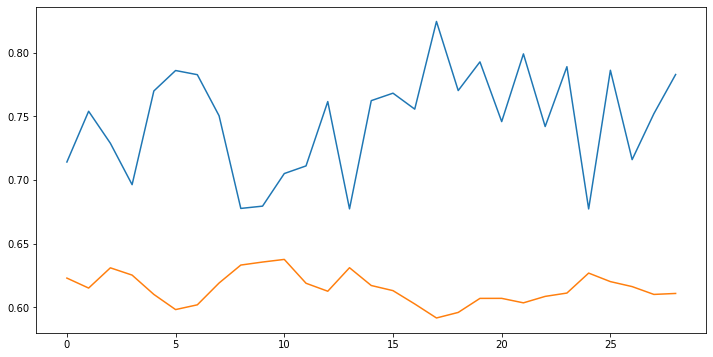

4it [00:00, 32.56it/s]

epoch: 29


150it [00:04, 32.46it/s]


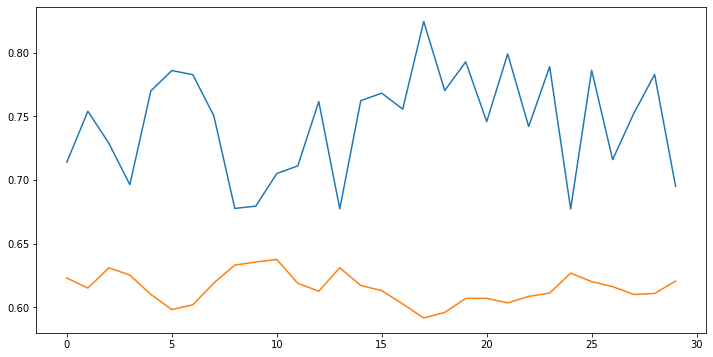

4it [00:00, 32.99it/s]

epoch: 30


150it [00:04, 32.64it/s]


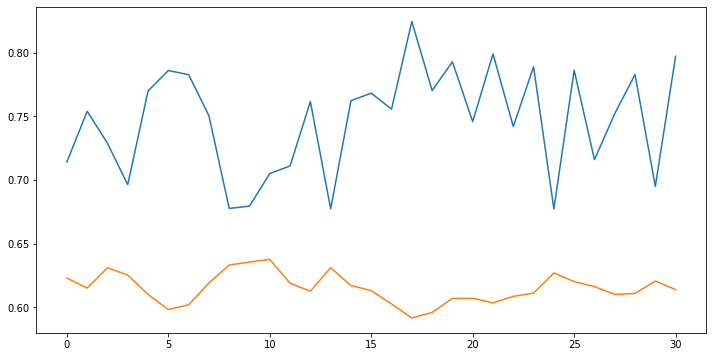

4it [00:00, 32.83it/s]

epoch: 31


150it [00:04, 32.75it/s]


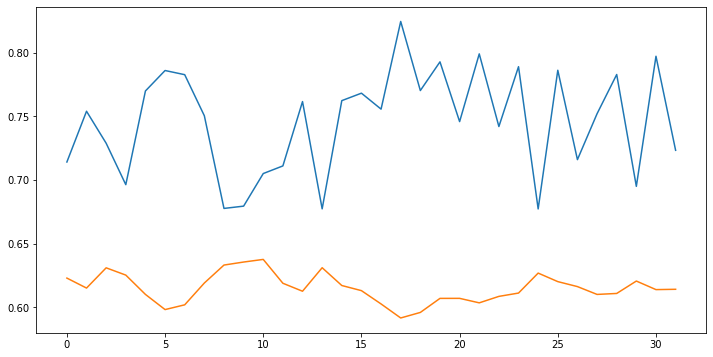

4it [00:00, 32.41it/s]

epoch: 32


150it [00:04, 32.70it/s]


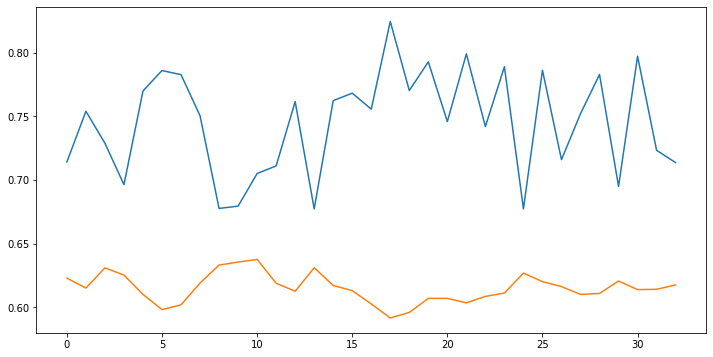

4it [00:00, 32.79it/s]

epoch: 33


150it [00:04, 32.49it/s]


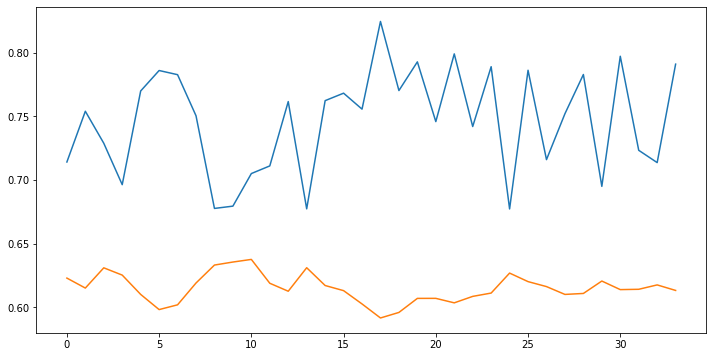

4it [00:00, 32.25it/s]

epoch: 34


150it [00:04, 32.45it/s]


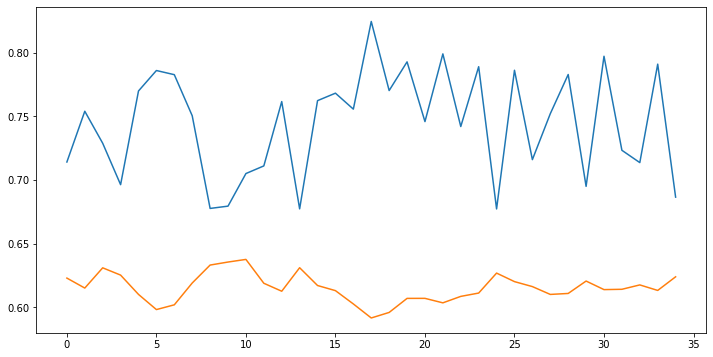

4it [00:00, 31.37it/s]

epoch: 35


150it [00:04, 32.28it/s]


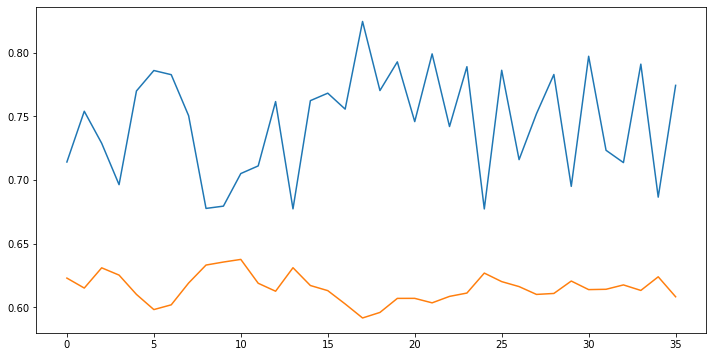

4it [00:00, 32.46it/s]

epoch: 36


150it [00:04, 32.25it/s]


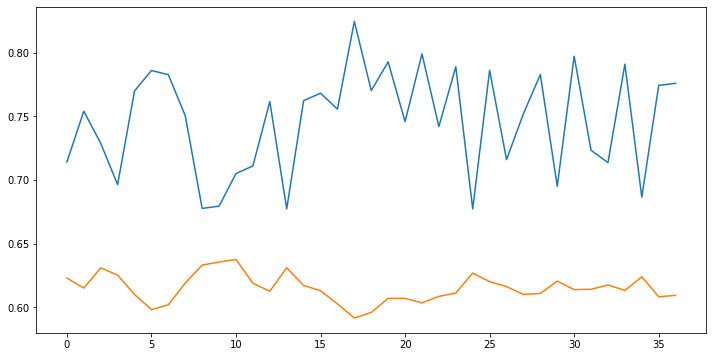

4it [00:00, 33.89it/s]

epoch: 37


150it [00:04, 32.03it/s]


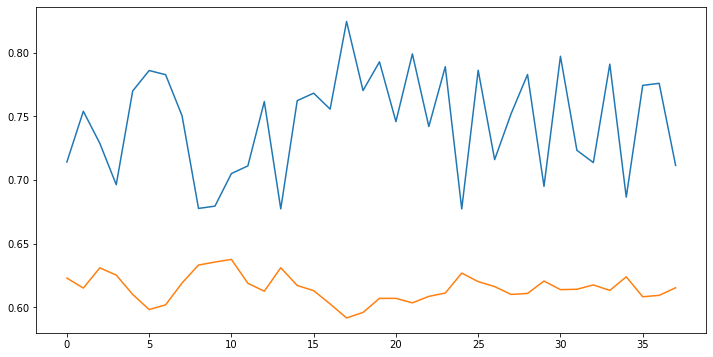

4it [00:00, 32.18it/s]

epoch: 38


150it [00:04, 31.84it/s]


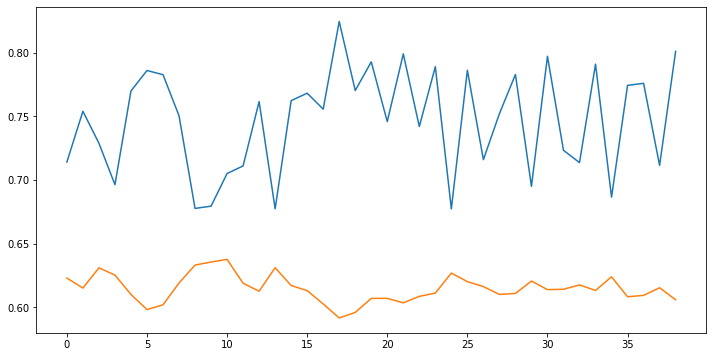

4it [00:00, 31.74it/s]

epoch: 39


150it [00:04, 32.08it/s]


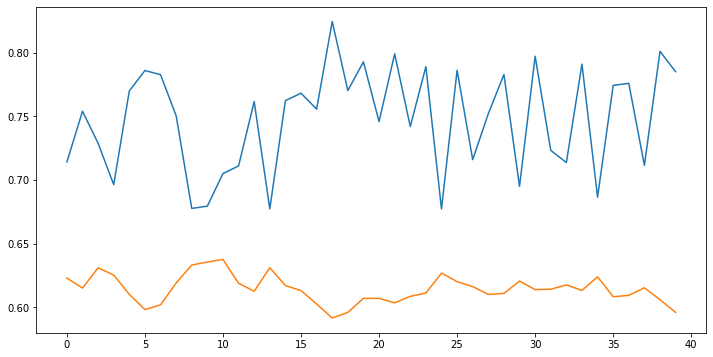

4it [00:00, 31.94it/s]

epoch: 40


150it [00:04, 32.56it/s]


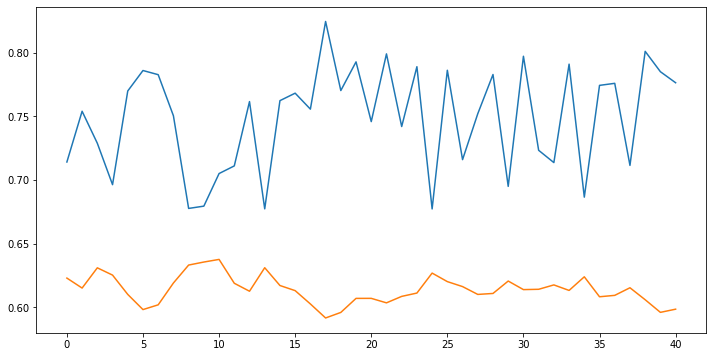

4it [00:00, 31.78it/s]

epoch: 41


150it [00:04, 32.74it/s]


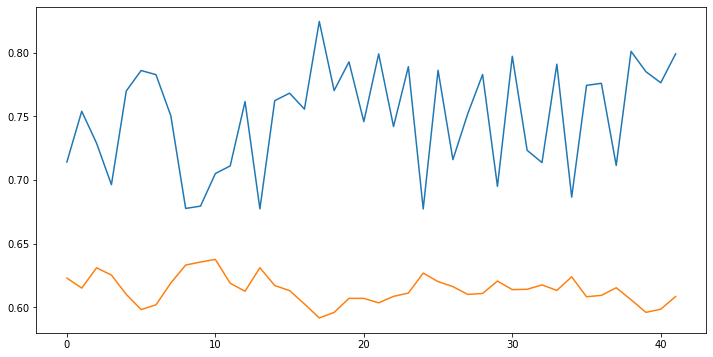

4it [00:00, 32.77it/s]

epoch: 42


150it [00:04, 32.62it/s]


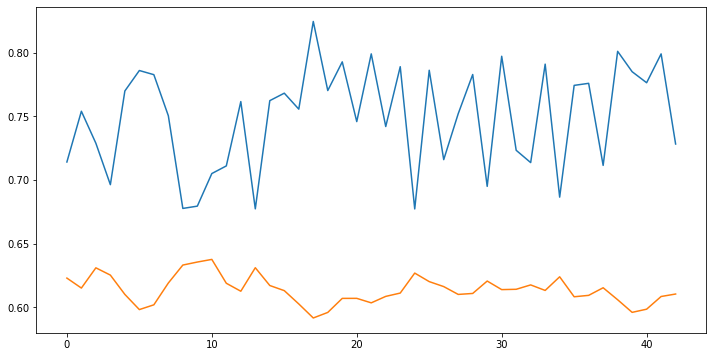

4it [00:00, 33.06it/s]

epoch: 43


150it [00:04, 32.63it/s]


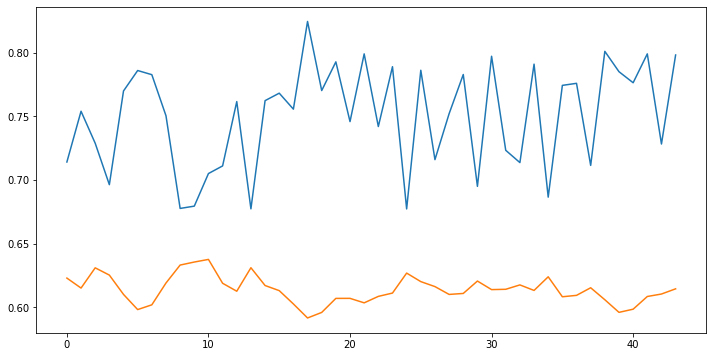

4it [00:00, 32.64it/s]

epoch: 44


150it [00:04, 32.40it/s]


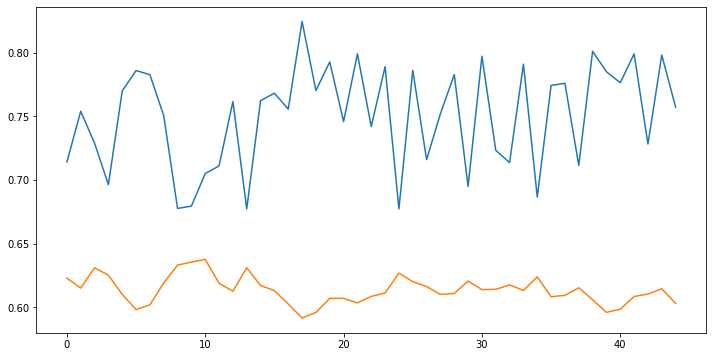

4it [00:00, 32.07it/s]

epoch: 45


150it [00:04, 32.55it/s]


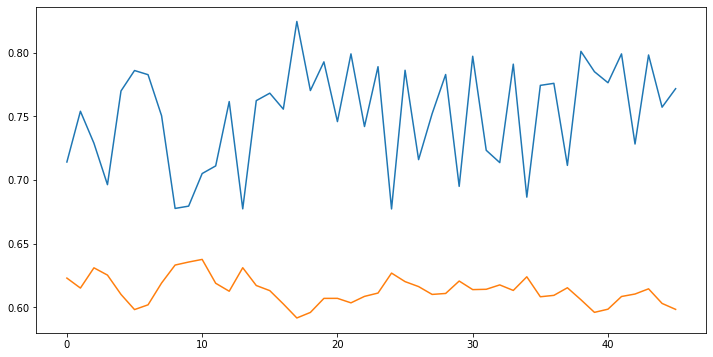

4it [00:00, 31.86it/s]

epoch: 46


150it [00:04, 32.69it/s]


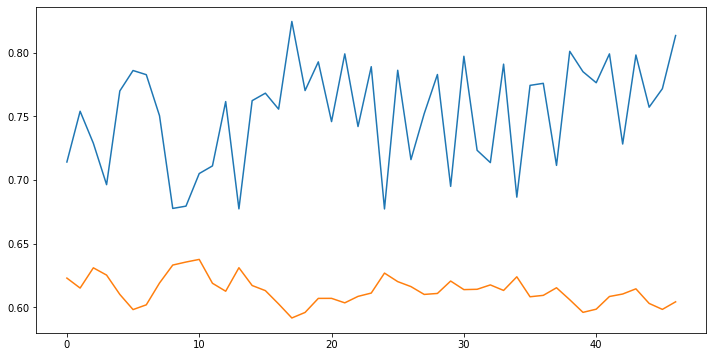

4it [00:00, 30.94it/s]

epoch: 47


150it [00:04, 32.52it/s]


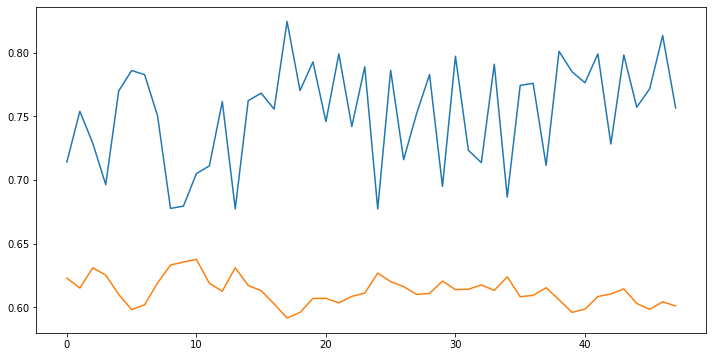

3it [00:00, 29.88it/s]

epoch: 48


150it [00:04, 32.18it/s]


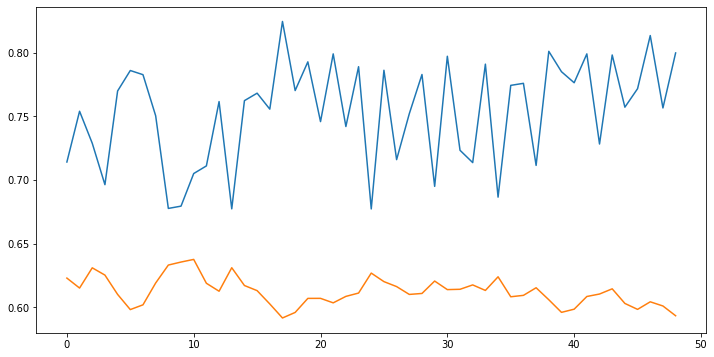

4it [00:00, 33.66it/s]

epoch: 49


150it [00:04, 32.56it/s]


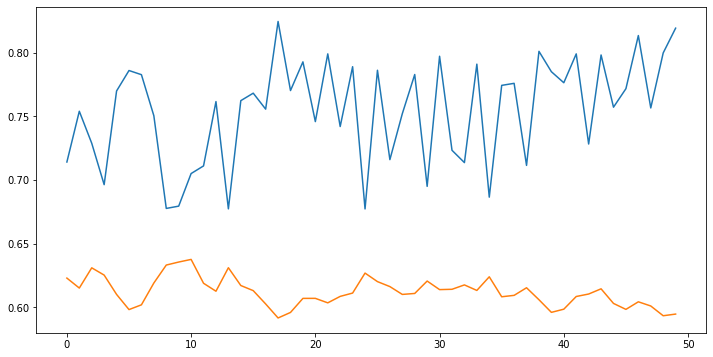

In [29]:
epoch=50
train_losses=[]

train_accuracy=[]


for i in range((epoch)):
  loader=get_batch([X_train_matrix,y_train],batch_size=100)
  print('epoch:',i)
  model.train(True)
  loss_epoch=[]
  accuracy_epoch=[]
  for x_batch,y_batch in tqdm(loader):
    #print(y_batch)
    #X_batch,Y_batch=torch.Tensor(x_batch.todense().astype(np.int32)).float(),torch.Tensor(np.array(y_batch)).float()
    #print(X_batch)
    x_batch = torch.from_numpy(x_batch.todense()).float()
    #x_batch
    y_batch = torch.from_numpy(np.array(y_batch)).float()
    X_batch=Variable(x_batch).cuda()
    Y_batch=Variable(y_batch).cuda()
    prediction=model(X_batch)
    #print('y')
    # print(Y_batch)
    prediction=prediction.reshape(-1)
    loss=criterion(prediction,Y_batch)
    #print(loss)
    loss.backward()
    optimizer.step()
    #optimizer.zero_grad()
    loss_epoch.append(loss.data.cpu().numpy())
    #print(loss_epoch)
    accuracy_epoch.append(accuracy_score(prediction.detach().cpu().numpy().round(),Y_batch.detach().cpu().numpy()))
  model.train(False)
  train_losses.append(np.mean(loss_epoch))
  train_accuracy.append(np.mean(accuracy_epoch))
  plt.figure(figsize=(12, 6))

  plt.plot(train_accuracy,label='accuracy')
  plt.plot(train_losses,label='loss')
  plt.show()



In [30]:
def prediction(model,data):
  preds=[]
  model.eval()
  loader=get_batch([data],batch_size=100)
  for test_batch in loader:
    x_batch = torch.from_numpy(test_batch.todense()).float()
    x_batch=Variable(x_batch).cuda()
    predictions = model(x_batch)
    predictions=predictions.reshape(-1)
    preds.append(predictions.detach().cpu().numpy().round())
  y_pred=np.concatenate(preds)
  return y_pred
y_pred_train=prediction(model,X_train_matrix)
y_pred_dev=prediction(model,X_dev_matrix)  
y_pred_dev_b=prediction(model,X_dev_b_matrix)
y_pred_test=prediction(model,X_test_matrix)
y_pred_test_b=prediction(model,X_test_b_matrix)
print('train_accuracy',accuracy_score(y_pred_train,y_train))
print('dev_accuracy',accuracy_score(y_pred_dev,y_dev))
print('dev_b_accuracy',accuracy_score(y_pred_dev_b,y_dev_b))

train_accuracy 0.7924
dev_accuracy 0.7575
dev_b_accuracy 0.6445


Using $\alpha$ and learning rate from 2.2.3 train the classifier on the whole train set. 


_Question: Evaluate the classifier performance on train and test sets? How much time does it take to train the classifier and to label test data?_

## 3. Research part

### 3.1 Logistic regression

Apart form classical gradient descent approach there are a lot of SGD variations, such as Adam, Adagrad, RMSProp, that are frequently used in the real-word cases. ([short](http://cs231n.github.io/neural-networks-3/#update) and [long](http://ruder.io/optimizing-gradient-descent/index.html#momentum) reviews on these approaches). The key thing about those approaches: apart from the gradients they use second derivative (momentum) for the next step.

1. Implement Momentum or Adagrad and use it to train your logreg. Draw several plots for training with different hyperparameter values. What can be observed from the results and what conclusions could be made?

2. In order to improve classification  performance it is important to understand why and where the classifier makes mistakes. Find some examples, define, which features lead to the errors (e.g., in positive reviews $w^Tx_{\{i\}}$ they are used with mostly negative weights making the scalar product negative and wrong classification as the result). Are there any common features or tendencies in the errors found? If so, tell which steps could be made to improve the classifier?

3. As bag-of-word vector component other different features may be used: absolute word counts, relative counts, binary features (whether the word appears in text), etc. We can transform each feature somehow: take logarithm, transform that each feature would belong to the [0, 1] range or normalize (substract mean value and divide by std). Try different approaches and describe the results.

### 3.2 Feed-forward Neural Network

1. Try to improve your neural classifier performance expermenting with model architecture (change number of layers and their sizes). Draw the training curves (loss and accuracy) showing dependency of 1) layer size 2) number of layers. According to your experiments, which structure should be considered as the most efficient?

2. Try other gradient descent algorithms to your model (e.g. Adam, Adagrad, RMSProp).